In [1]:
from adler.dataclasses.AdlerPlanetoid import AdlerPlanetoid
from adler.science.PhaseCurve import PhaseCurve
from adler.utilities.plotting_utilities import plot_errorbar
import adler.utilities.science_utilities as sci_utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import astropy.units as u

In [2]:
# notebook to show adler searching for outlying photometry
# we could simply use the adler api to do this, but let's demo the CLI that would be running on a server

In [3]:
# ssObjectId of object to analyse
ssoid1 = "6098332225018"  # good test object
ssoid2 = "6098332225018000"  # fake outburst object
filt = "r"

In [4]:
# here we use an offline SQL database which contains the observations of the sso
fname = "/home/jrob/lsst-adler/notebooks/gen_test_data/adler_demo_testing_database.db"
planetoid1 = AdlerPlanetoid.construct_from_SQL(ssoid1, sql_filename=fname)
planetoid2 = AdlerPlanetoid.construct_from_SQL(ssoid2, sql_filename=fname)

# or query DP0.3 directly when on RSP
# planetoid1 = AdlerPlanetoid.construct_from_RSP(ssoid1)

In [5]:
planetoid1

In [6]:
planetoid1.__dict__

{'ssObjectId': '6098332225018',
 'filter_list': ['g', 'r', 'i', 'z'],
 'date_range': [60000.0, 67300.0],
 'observations_by_filter': [Observations(ssObjectId='6098332225018', filter_name='g', mag=array([23.27199936, 22.86400032, 22.82500076, 22.3920002 , 22.37199974,
         22.40399933, 22.41900063, 22.70000076, 22.62000084, 22.47299957,
         22.12999916, 22.1609993 , 22.18899918, 21.91500092, 21.86400032,
         21.84399986, 21.92300034, 22.4260006 , 22.89800072, 21.39800072,
         21.46299934, 21.85099983, 22.39900017, 22.39500046, 22.04299927,
         21.18000031, 21.17000008, 22.12800026, 21.99500084, 21.68099976,
         21.72699928, 22.19099998, 22.25600052, 22.32600021, 20.65500069,
         20.6060009 , 21.29999924, 20.73699951, 20.77199936, 21.13999939,
         20.7310009 , 20.77599907, 20.8220005 ]), magErr=array([0.132, 0.052, 0.057, 0.044, 0.046, 0.037, 0.036, 0.062, 0.047,
         0.039, 0.032, 0.03 , 0.032, 0.029, 0.033, 0.044, 0.022, 0.033,
         0.055, 

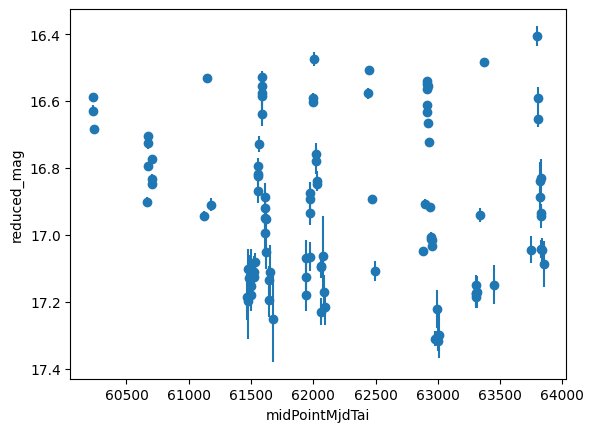

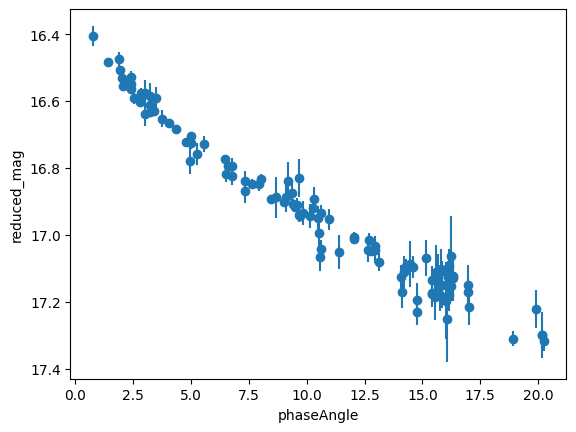

In [7]:
fig = plot_errorbar(planetoid1, filt_list=["r"], x_plot="midPointMjdTai", y_plot="reduced_mag")
fig = plot_errorbar(planetoid1, filt_list=["r"], x_plot="phaseAngle", y_plot="reduced_mag")

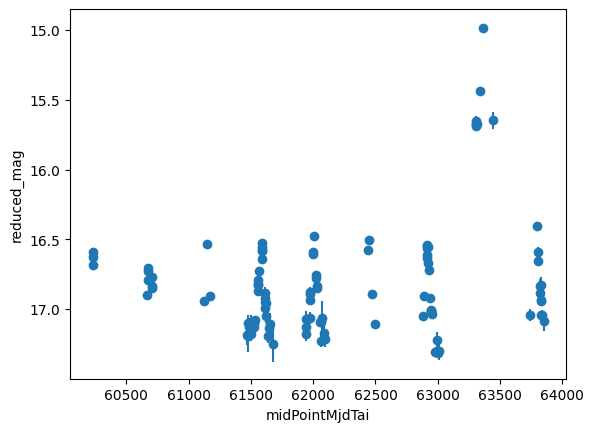

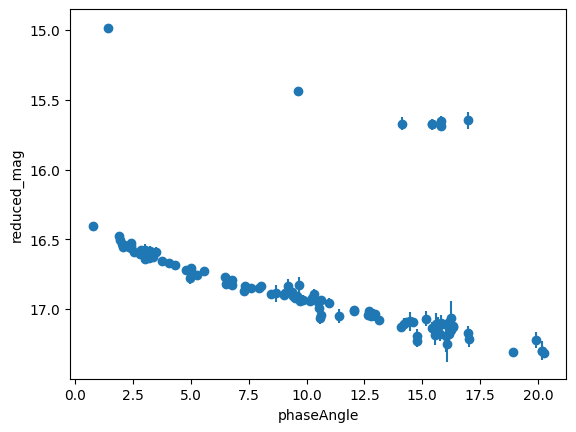

In [8]:
fig = plot_errorbar(planetoid2, filt_list=["r"], x_plot="midPointMjdTai", y_plot="reduced_mag")
fig = plot_errorbar(planetoid2, filt_list=["r"], x_plot="phaseAngle", y_plot="reduced_mag")

In [9]:
# inspect observations

In [10]:
obs = planetoid1.observations_in_filter(filt)

In [11]:
df_obs = pd.DataFrame(obs.__dict__)

In [12]:
df_obs

,ssObjectId,filter_name,mag,magErr,midPointMjdTai,ra,dec,phaseAngle,topocentricDist,heliocentricDist,reduced_mag,num_obs
0,6098332225018,r,22.760000,0.069,61469.38552,272.404111,-24.234828,15.537251,3.699083,3.521290,17.186021,109
1,6098332225018,r,22.643999,0.060,61473.39835,273.311348,-24.189850,15.804915,3.644592,3.524037,17.100552,109
2,6098332225018,r,22.708000,0.114,61477.39732,274.162500,-24.140413,16.024870,3.589410,3.526729,17.196024,109
3,6098332225018,r,22.575001,0.068,61485.38436,275.693450,-24.031717,16.314137,3.477325,3.531972,17.128688,109
4,6098332225018,r,22.465000,0.042,61497.32416,277.520845,-23.855948,16.335381,3.307792,3.539473,17.122616,109
...,...,...,...,...,...,...,...,...,...,...,...,...
104,6098332225018,r,20.311001,0.013,60705.11646,109.793814,18.921026,7.616888,1.799676,2.739629,16.846570,109
105,6098332225018,r,20.304001,0.016,60706.12867,109.613810,18.928812,8.016209,1.804875,2.739833,16.833145,109
106,6098332225018,r,20.698000,0.012,62469.15210,37.696298,19.070094,8.446361,1.985002,2.905847,16.892832,109
107,6098332225018,r,20.289000,0.012,62445.22742,42.202635,21.014299,1.922925,1.945042,2.933355,16.507531,109


In [13]:
tmin = np.amin(np.floor(df_obs["midPointMjdTai"]))  # mjd
tmax = np.amax(np.floor(df_obs["midPointMjdTai"])) + 1  # mjd
tmin, tmax

(60231.0, 63852.0)

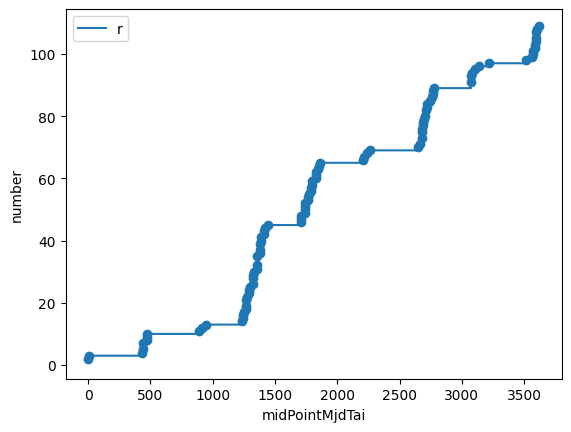

In [14]:
# cumulative data in filter
x_plot = "midPointMjdTai"
df_plot = df_obs.sort_values(x_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1, 1)
ax1 = plt.subplot(gs[0, 0])

bins = np.arange(tmin, tmax + 1)

values, base = np.histogram(df_plot[x_plot], bins=bins)
cumulative = np.cumsum(values)
ax1.plot(base[:-1] - base[0], cumulative, label=filt)

data_mask = np.diff(cumulative) > 0
data_nights = base[1:-1][data_mask]
N_data = cumulative[1:][data_mask]

ax1.scatter(data_nights - data_nights[0], N_data)

ax1.set_xlabel(x_plot)
ax1.set_ylabel("number")
ax1.legend()

plt.show()

In [15]:
# number of data points per night of new data
np.diff(N_data)

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1])

In [16]:
# nights when new data arrives
data_nights

array([60233., 60236., 60666., 60672., 60676., 60702., 60705., 60706.,
       61120., 61145., 61175., 61469., 61473., 61477., 61485., 61497.,
       61500., 61503., 61504., 61524., 61525., 61531., 61556., 61558.,
       61559., 61562., 61586., 61587., 61589., 61610., 61615., 61616.,
       61618., 61620., 61641., 61648., 61650., 61677., 61939., 61940.,
       61945., 61971., 61972., 61974., 61976., 61999., 62000., 62003.,
       62020., 62021., 62028., 62030., 62058., 62059., 62061., 62074.,
       62089., 62091., 62442., 62445., 62469., 62494., 62883., 62893.,
       62910., 62913., 62915., 62918., 62924., 62926., 62939., 62947.,
       62949., 62950., 62979., 62991., 62998., 63001., 63011., 63305.,
       63308., 63316., 63335., 63367., 63447., 63744., 63793., 63803.,
       63804., 63821., 63823., 63825., 63827., 63829., 63839., 63851.])

In [17]:
# write commands to simulate adler cli searching for phase curve outliers on incoming data

In [18]:
# cmd_list = []
# outpath = "~/lsst-adler/logging"
# cmd = "adler -s {} -f {} -o {}".format(ssoid2,filt,outpath)

# for t0 in data_nights:
#     t1 = t0+1

#     mask = (df_obs["midPointMjdTai"]<t1)
#     _df_obs = df_obs[mask]
#     # print(t0,t1, len(_df_obs))
#     _cmd = cmd + " -i {} -d {} {}".format(fname, tmin,t1)
#     print(_cmd)
#     cmd_list.append(_cmd)

In [19]:
# cmd_file = "../adler_demo_cli/adler_{}.sh".format(ssoid2)
# with open(cmd_file,"w") as f:
#     f.write("#!/usr/bin/env bash\n")
#     f.write("\n".join(cmd_list))

In [20]:
# using the adler api, search for outliers

continue
60236.0 60237.0 2 1 Parameter('H', value=16.29259875057048, unit=mag) Parameter('G12', value=0.62, unit=, bounds=[0, 1])
[0.00167543] mag
[False]
save data/outlier_6098332225018000_60236
plots/phase_curve_6098332225018000_60236.png


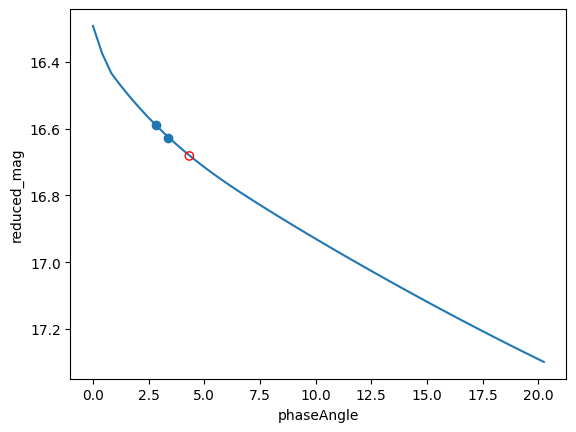

60666.0 60667.0 3 1 Parameter('H', value=16.293269386459645, unit=mag) Parameter('G12', value=0.62, unit=, bounds=[0, 1])
[0.01000294] mag
[False]
save data/outlier_6098332225018000_60666
plots/phase_curve_6098332225018000_60666.png


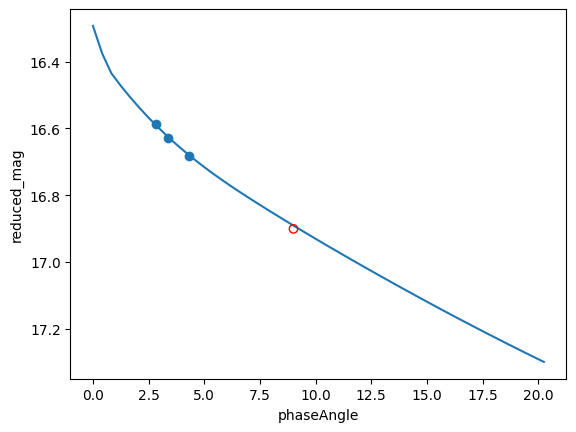

60672.0 60673.0 4 1 Parameter('H', value=16.295107699860417, unit=mag) Parameter('G12', value=0.62, unit=, bounds=[0, 1])
[0.00084181] mag
[False]
save data/outlier_6098332225018000_60672
plots/phase_curve_6098332225018000_60672.png


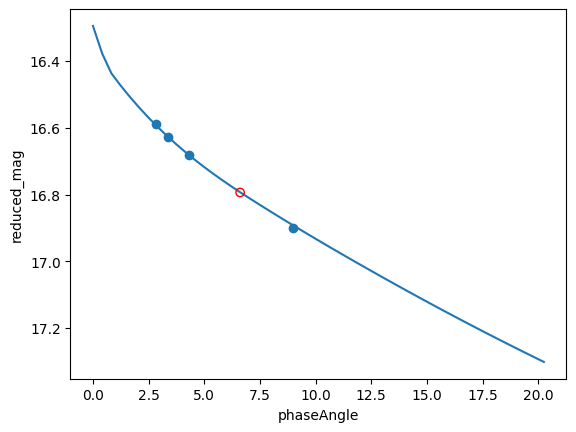

60676.0 60677.0 5 2 Parameter('H', value=16.29534337479441, unit=mag) Parameter('G12', value=0.62, unit=, bounds=[0, 1])
[-0.01286632  0.00917784] mag
[False False]
save data/outlier_6098332225018000_60676
plots/phase_curve_6098332225018000_60676.png


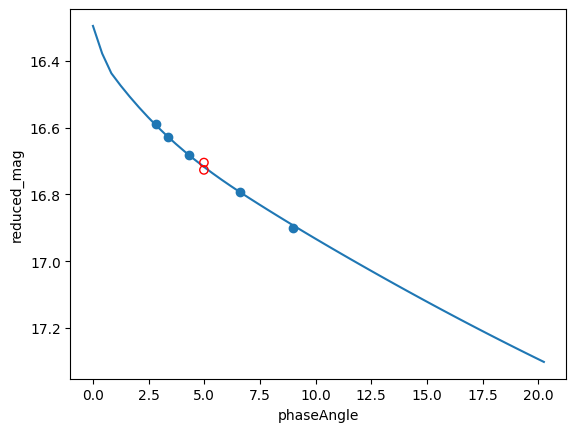

60702.0 60703.0 7 1 Parameter('H', value=16.29401818601951, unit=mag) Parameter('G12', value=0.62, unit=, bounds=[0, 1])
[-0.01209199] mag
[False]
save data/outlier_6098332225018000_60702
plots/phase_curve_6098332225018000_60702.png


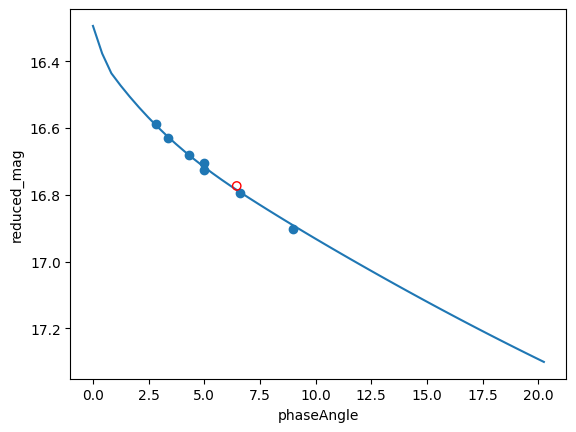

60705.0 60706.0 8 1 Parameter('H', value=16.29247241215829, unit=mag) Parameter('G12', value=0.62, unit=, bounds=[0, 1])
[0.01321837] mag
[False]
save data/outlier_6098332225018000_60705
plots/phase_curve_6098332225018000_60705.png


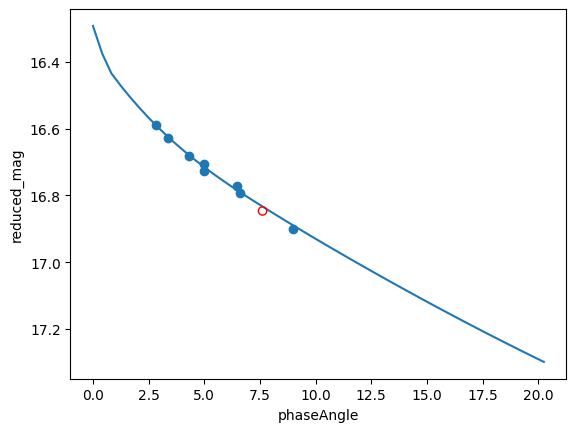

60706.0 60707.0 9 1 Parameter('H', value=16.293970649676055, unit=mag) Parameter('G12', value=0.62, unit=, bounds=[0, 1])
[-0.01828646] mag
[False]
save data/outlier_6098332225018000_60706
plots/phase_curve_6098332225018000_60706.png


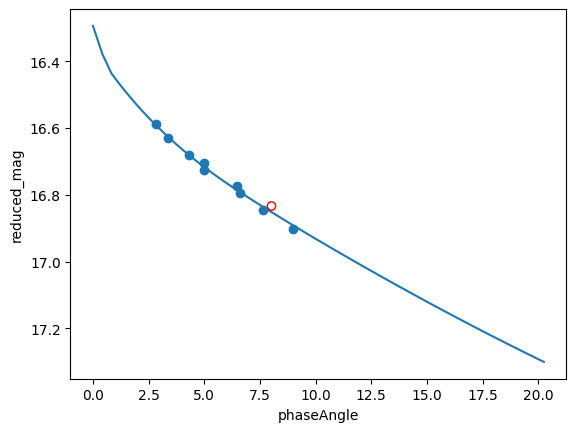

61120.0 61121.0 10 1 Parameter('H', value=16.309316849336383, unit=mag) Parameter('G12', value=0.702862502959537, unit=, bounds=[0, 1])
[0.0181883] mag
[False]
save data/outlier_6098332225018000_61120
plots/phase_curve_6098332225018000_61120.png


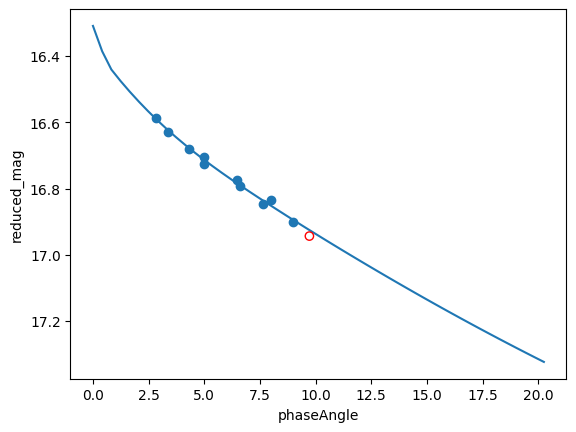

61145.0 61146.0 11 1 Parameter('H', value=16.33434736145541, unit=mag) Parameter('G12', value=0.8261153481101946, unit=, bounds=[0, 1])
[-0.00656506] mag
[False]
save data/outlier_6098332225018000_61145
plots/phase_curve_6098332225018000_61145.png


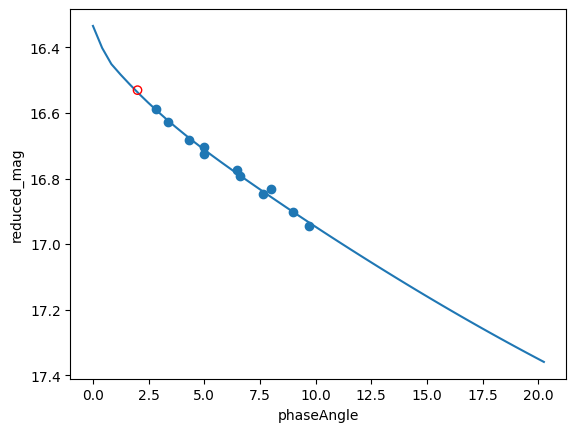

61175.0 61176.0 12 1 Parameter('H', value=16.330209235268253, unit=mag) Parameter('G12', value=0.8089014064718072, unit=, bounds=[0, 1])
[-0.01664306] mag
[False]
save data/outlier_6098332225018000_61175
plots/phase_curve_6098332225018000_61175.png


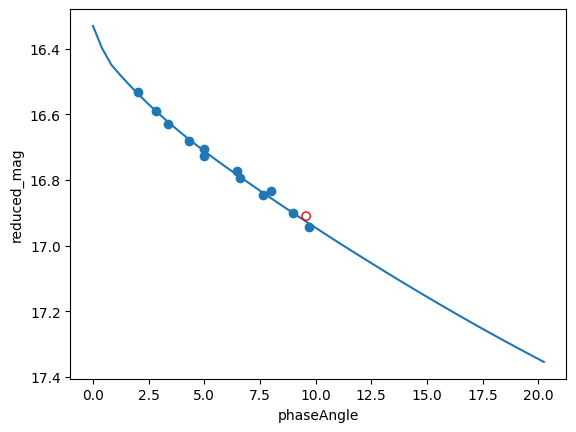

61469.0 61470.0 13 1 Parameter('H', value=16.321441444838634, unit=mag) Parameter('G12', value=0.7650215314358947, unit=, bounds=[0, 1])
[0.01812848] mag
[False]
save data/outlier_6098332225018000_61469
plots/phase_curve_6098332225018000_61469.png


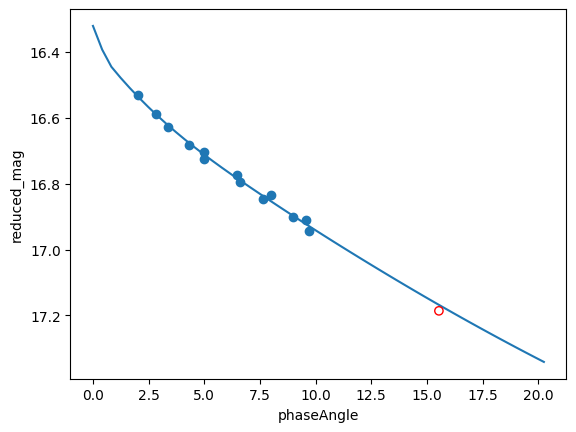

61473.0 61474.0 14 1 Parameter('H', value=16.32348549913327, unit=mag) Parameter('G12', value=0.7757582788738672, unit=, bounds=[0, 1])
[-0.07986788] mag
[False]
save data/outlier_6098332225018000_61473
plots/phase_curve_6098332225018000_61473.png


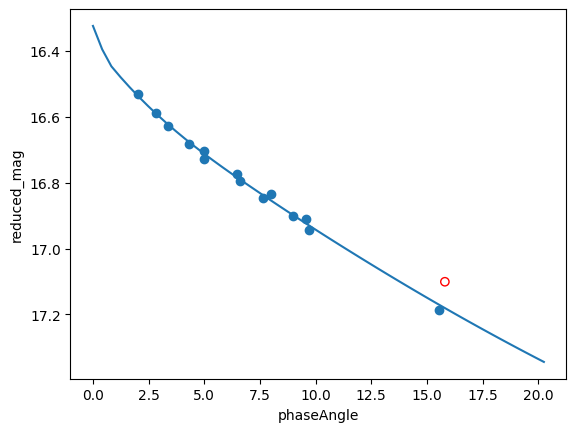

61477.0 61478.0 15 1 Parameter('H', value=16.313058957815667, unit=mag) Parameter('G12', value=0.7211769942636579, unit=, bounds=[0, 1])
[0.01855774] mag
[False]
save data/outlier_6098332225018000_61477
plots/phase_curve_6098332225018000_61477.png


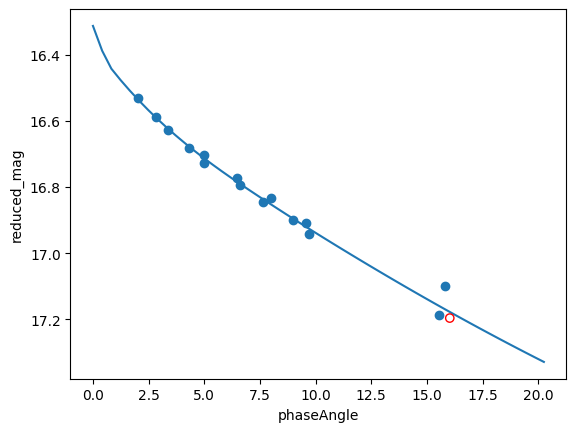

61485.0 61486.0 16 1 Parameter('H', value=16.313712220849112, unit=mag) Parameter('G12', value=0.7245825582125767, unit=, bounds=[0, 1])
[-0.06030886] mag
[False]
save data/outlier_6098332225018000_61485
plots/phase_curve_6098332225018000_61485.png


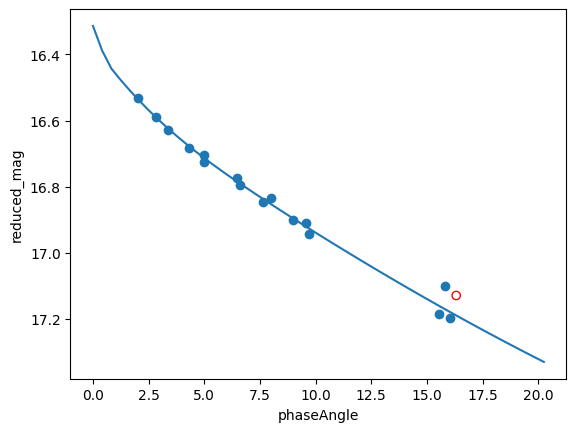

61497.0 61498.0 17 1 Parameter('H', value=16.30823483301463, unit=mag) Parameter('G12', value=0.6960725577528603, unit=, bounds=[0, 1])
[-0.06098681] mag
[False]
save data/outlier_6098332225018000_61497
plots/phase_curve_6098332225018000_61497.png


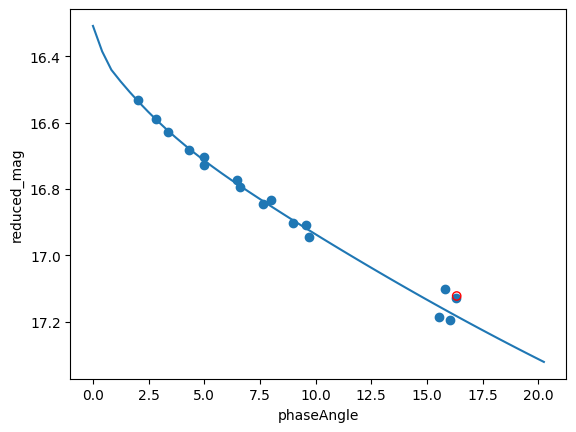

61500.0 61501.0 18 1 Parameter('H', value=16.29689422784195, unit=mag) Parameter('G12', value=0.6375239231992424, unit=, bounds=[0, 1])
[-0.0157216] mag
[False]
save data/outlier_6098332225018000_61500
plots/phase_curve_6098332225018000_61500.png


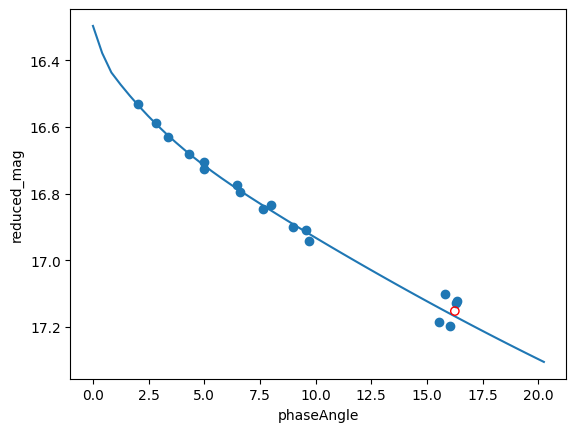

61503.0 61504.0 19 2 Parameter('H', value=16.29476689273694, unit=mag) Parameter('G12', value=0.6266166523025728, unit=, bounds=[0, 1])
[-0.067454    0.01855137] mag
[False False]
save data/outlier_6098332225018000_61503
plots/phase_curve_6098332225018000_61503.png


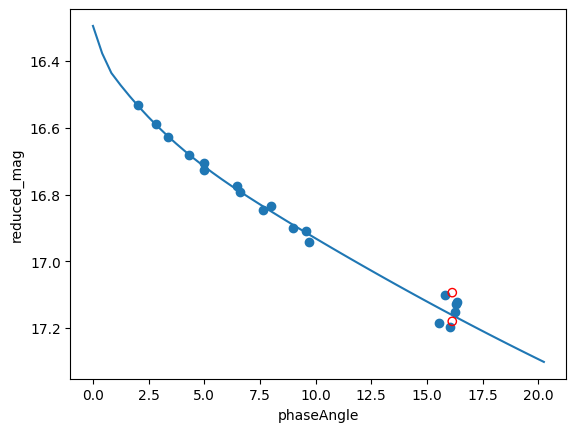

61504.0 61505.0 21 1 Parameter('H', value=16.291072961206535, unit=mag) Parameter('G12', value=0.6077409926302827, unit=, bounds=[0, 1])
[-0.03101143] mag
[False]
save data/outlier_6098332225018000_61504
plots/phase_curve_6098332225018000_61504.png


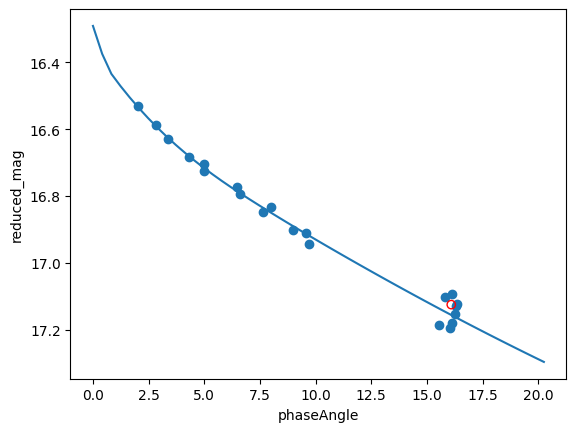

61524.0 61525.0 22 1 Parameter('H', value=16.288361200866557, unit=mag) Parameter('G12', value=0.5939311559966436, unit=, bounds=[0, 1])
[0.02324269] mag
[False]
save data/outlier_6098332225018000_61524
plots/phase_curve_6098332225018000_61524.png


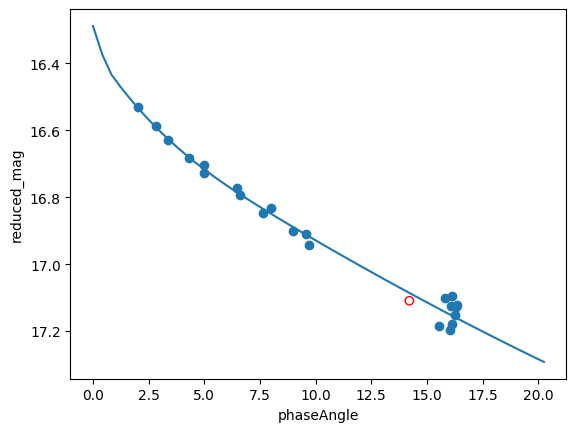

61525.0 61526.0 23 1 Parameter('H', value=16.289864424585065, unit=mag) Parameter('G12', value=0.601460645985327, unit=, bounds=[0, 1])
[0.04361256] mag
[False]
save data/outlier_6098332225018000_61525
plots/phase_curve_6098332225018000_61525.png


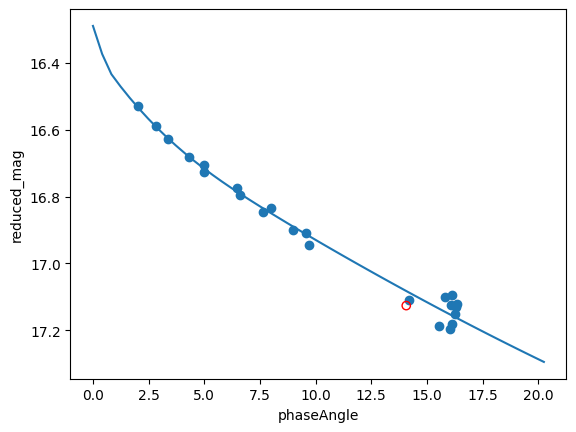

61531.0 61532.0 24 1 Parameter('H', value=16.294345975489787, unit=mag) Parameter('G12', value=0.6239336053202235, unit=, bounds=[0, 1])
[0.02854251] mag
[False]
save data/outlier_6098332225018000_61531
plots/phase_curve_6098332225018000_61531.png


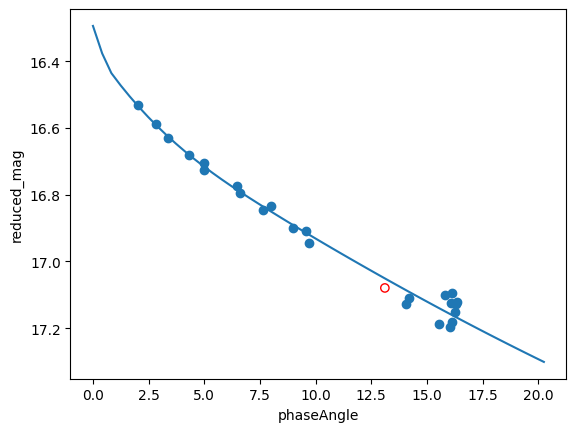

61556.0 61557.0 25 1 Parameter('H', value=16.298406598940034, unit=mag) Parameter('G12', value=0.6440682621839584, unit=, bounds=[0, 1])
[0.04733952] mag
[False]
save data/outlier_6098332225018000_61556
plots/phase_curve_6098332225018000_61556.png


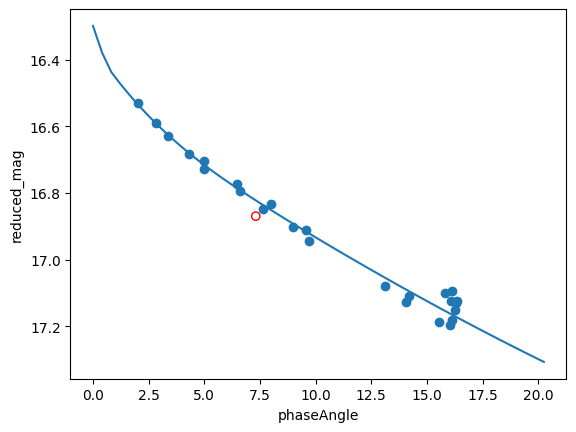

61558.0 61559.0 26 2 Parameter('H', value=16.29862890399242, unit=mag) Parameter('G12', value=0.642453762457689, unit=, bounds=[0, 1])
[ 0.02578272 -0.00418953] mag
[False False]
save data/outlier_6098332225018000_61558
plots/phase_curve_6098332225018000_61558.png


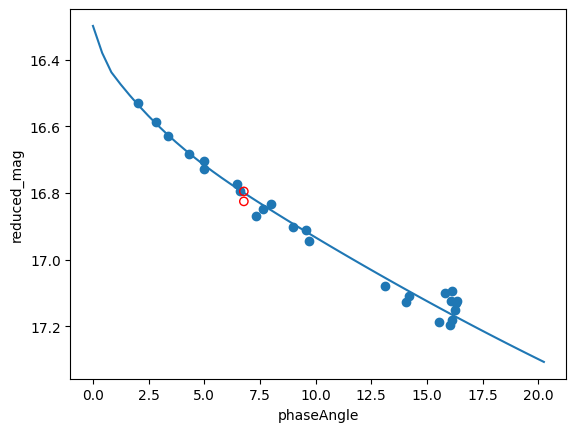

61559.0 61560.0 28 1 Parameter('H', value=16.298528434093566, unit=mag) Parameter('G12', value=0.639304047233601, unit=, bounds=[0, 1])
[0.02977791] mag
[False]
save data/outlier_6098332225018000_61559
plots/phase_curve_6098332225018000_61559.png


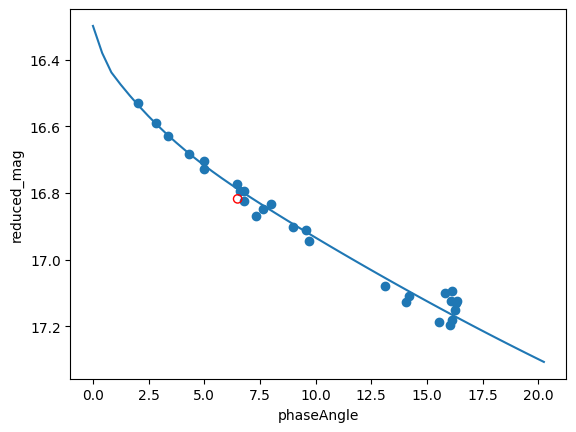

61562.0 61563.0 29 1 Parameter('H', value=16.29820920712351, unit=mag) Parameter('G12', value=0.6341349636817943, unit=, bounds=[0, 1])
[-0.0190658] mag
[False]
save data/outlier_6098332225018000_61562
plots/phase_curve_6098332225018000_61562.png


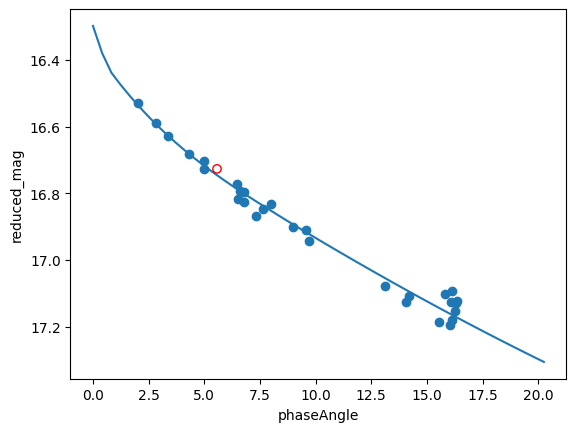

61586.0 61587.0 30 1 Parameter('H', value=16.298703027366997, unit=mag) Parameter('G12', value=0.6389995720626995, unit=, bounds=[0, 1])
[0.01622061] mag
[False]
save data/outlier_6098332225018000_61586
plots/phase_curve_6098332225018000_61586.png


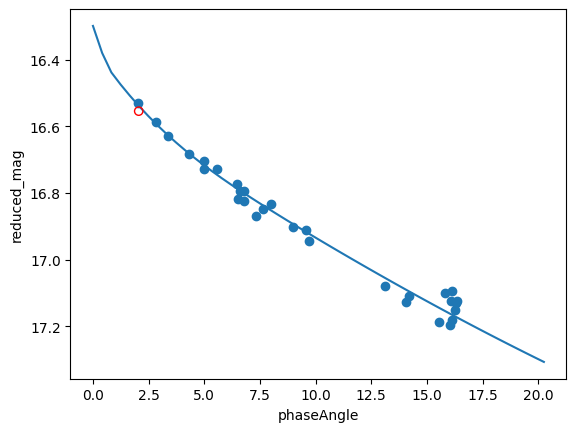

61587.0 61588.0 31 1 Parameter('H', value=16.299527425438324, unit=mag) Parameter('G12', value=0.6386007941941799, unit=, bounds=[0, 1])
[-0.0349913] mag
[False]
save data/outlier_6098332225018000_61587
plots/phase_curve_6098332225018000_61587.png


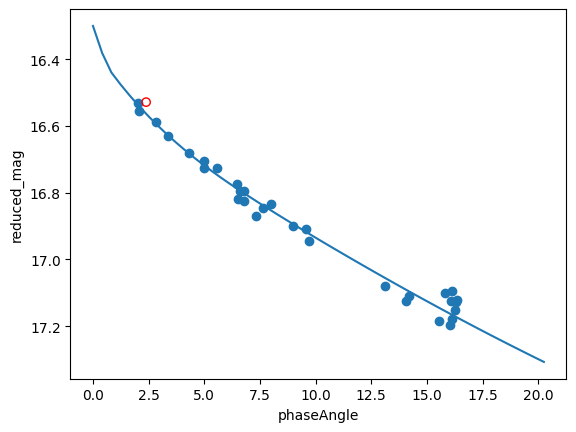

61589.0 61590.0 32 3 Parameter('H', value=16.299288923884642, unit=mag) Parameter('G12', value=0.6429412933590207, unit=, bounds=[0, 1])
[ 0.03450856 -0.0295452  -0.03343057] mag
[False False False]
save data/outlier_6098332225018000_61589
plots/phase_curve_6098332225018000_61589.png


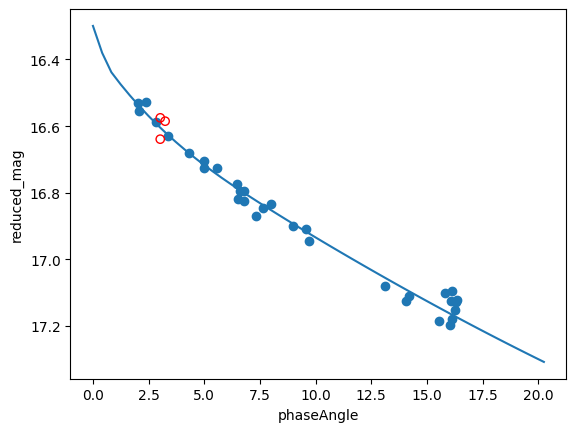

61610.0 61611.0 35 1 Parameter('H', value=16.299455781352687, unit=mag) Parameter('G12', value=0.6446183223529809, unit=, bounds=[0, 1])
[-0.00916379] mag
[False]
save data/outlier_6098332225018000_61610
plots/phase_curve_6098332225018000_61610.png


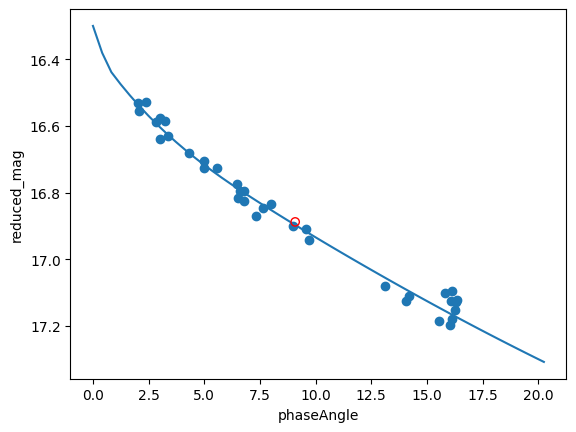

61615.0 61616.0 36 1 Parameter('H', value=16.299287949283745, unit=mag) Parameter('G12', value=0.6439552252453921, unit=, bounds=[0, 1])
[-0.02456562] mag
[False]
save data/outlier_6098332225018000_61615
plots/phase_curve_6098332225018000_61615.png


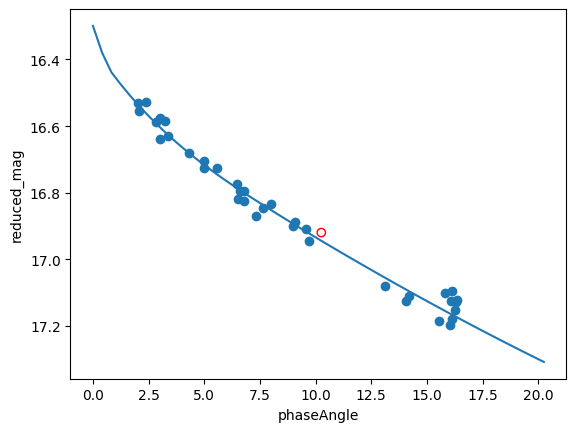

61616.0 61617.0 37 2 Parameter('H', value=16.298066633754004, unit=mag) Parameter('G12', value=0.6384269617320278, unit=, bounds=[0, 1])
[-0.00487434  0.04040981] mag
[False False]
save data/outlier_6098332225018000_61616
plots/phase_curve_6098332225018000_61616.png


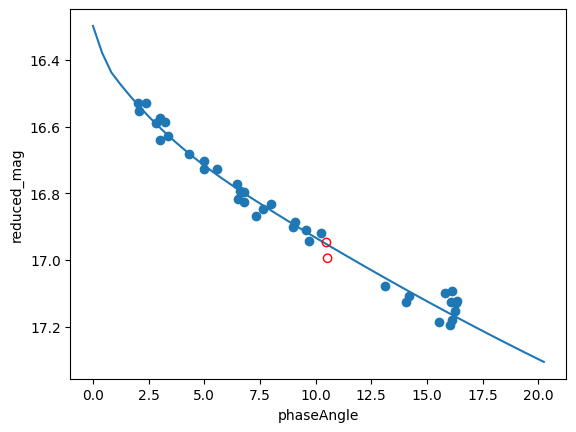

61618.0 61619.0 39 1 Parameter('H', value=16.298867276985202, unit=mag) Parameter('G12', value=0.6421207334741011, unit=, bounds=[0, 1])
[-0.01863271] mag
[False]
save data/outlier_6098332225018000_61618
plots/phase_curve_6098332225018000_61618.png


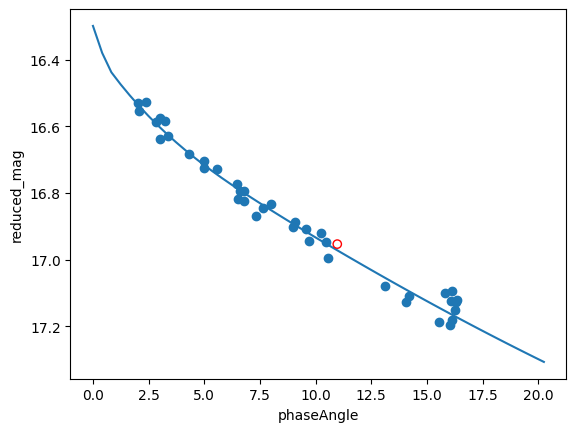

61620.0 61621.0 40 1 Parameter('H', value=16.29759970206829, unit=mag) Parameter('G12', value=0.6361420020294433, unit=, bounds=[0, 1])
[0.06300474] mag
[False]
save data/outlier_6098332225018000_61620
plots/phase_curve_6098332225018000_61620.png


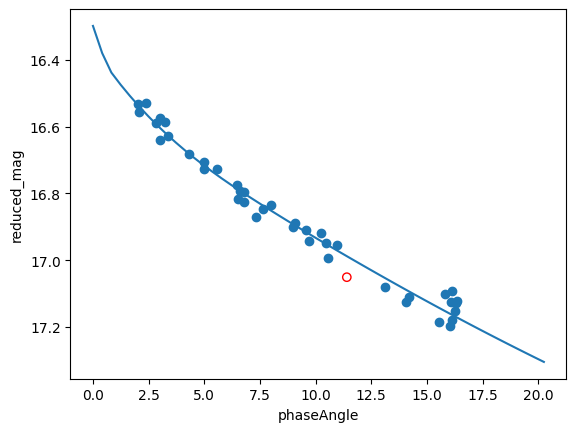

61641.0 61642.0 41 1 Parameter('H', value=16.29921722898937, unit=mag) Parameter('G12', value=0.6439152028326958, unit=, bounds=[0, 1])
[0.07679791] mag
[False]
save data/outlier_6098332225018000_61641
plots/phase_curve_6098332225018000_61641.png


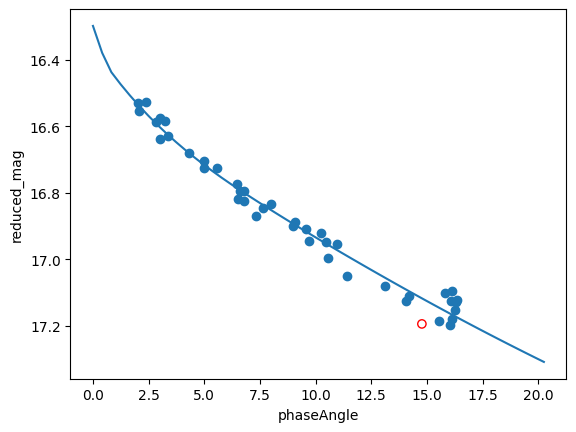

61648.0 61649.0 42 1 Parameter('H', value=16.302586285287173, unit=mag) Parameter('G12', value=0.6613123177764325, unit=, bounds=[0, 1])
[-0.00869956] mag
[False]
save data/outlier_6098332225018000_61648
plots/phase_curve_6098332225018000_61648.png


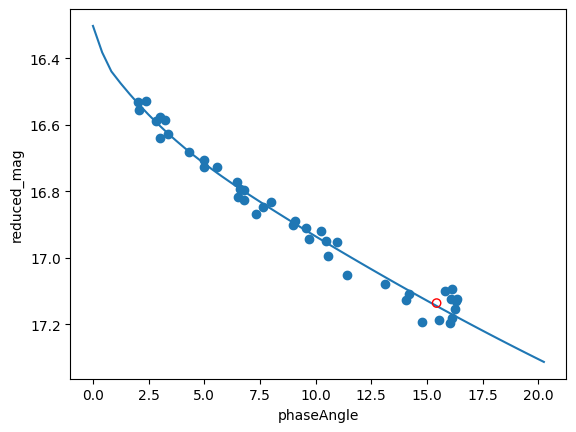

61650.0 61651.0 43 1 Parameter('H', value=16.30204224992166, unit=mag) Parameter('G12', value=0.6584800090104532, unit=, bounds=[0, 1])
[-0.03879662] mag
[False]
save data/outlier_6098332225018000_61650
plots/phase_curve_6098332225018000_61650.png


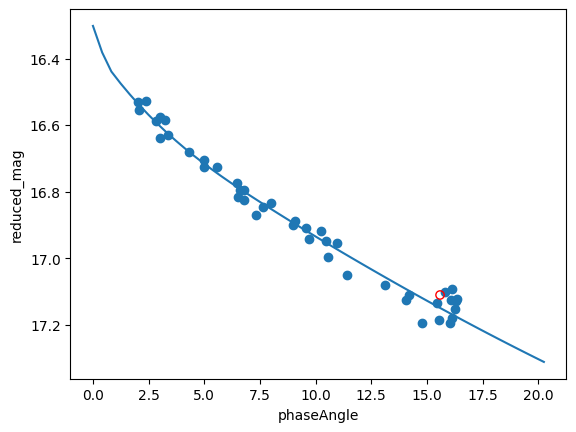

61677.0 61678.0 44 1 Parameter('H', value=16.301391571774733, unit=mag) Parameter('G12', value=0.6550893922041363, unit=, bounds=[0, 1])
[0.08458144] mag
[False]
save data/outlier_6098332225018000_61677
plots/phase_curve_6098332225018000_61677.png


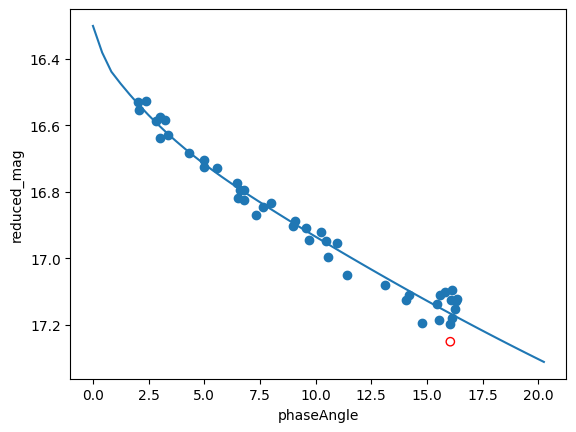

61939.0 61940.0 45 1 Parameter('H', value=16.301972143340066, unit=mag) Parameter('G12', value=0.6581275058821329, unit=, bounds=[0, 1])
[0.02298059] mag
[False]
save data/outlier_6098332225018000_61939
plots/phase_curve_6098332225018000_61939.png


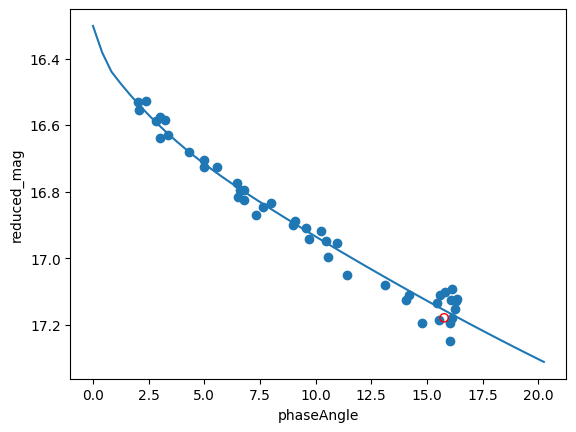

61940.0 61941.0 46 1 Parameter('H', value=16.303027569705602, unit=mag) Parameter('G12', value=0.6636411269137679, unit=, bounds=[0, 1])
[-0.02772438] mag
[False]
save data/outlier_6098332225018000_61940
plots/phase_curve_6098332225018000_61940.png


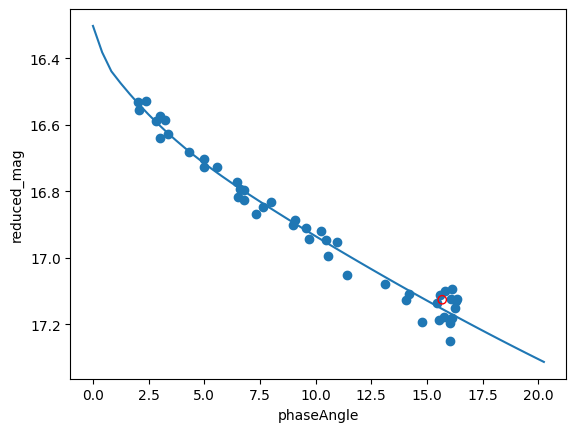

61945.0 61946.0 47 1 Parameter('H', value=16.30243048906068, unit=mag) Parameter('G12', value=0.6605239167852962, unit=, bounds=[0, 1])
[-0.06565667] mag
[False]
save data/outlier_6098332225018000_61945
plots/phase_curve_6098332225018000_61945.png


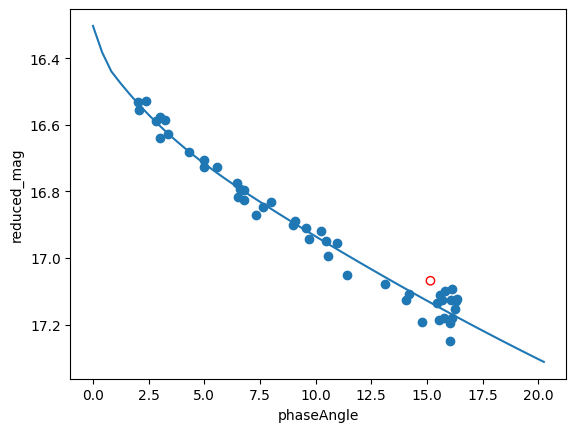

61971.0 61972.0 48 1 Parameter('H', value=16.300239026609926, unit=mag) Parameter('G12', value=0.6491653212156279, unit=, bounds=[0, 1])
[0.10656573] mag
[False]
save data/outlier_6098332225018000_61971
plots/phase_curve_6098332225018000_61971.png


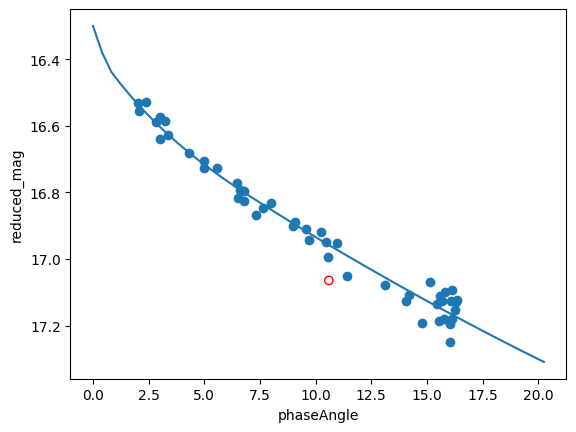

61972.0 61973.0 49 1 Parameter('H', value=16.302672092562048, unit=mag) Parameter('G12', value=0.6600495412185328, unit=, bounds=[0, 1])
[-0.05541385] mag
[False]
save data/outlier_6098332225018000_61972
plots/phase_curve_6098332225018000_61972.png


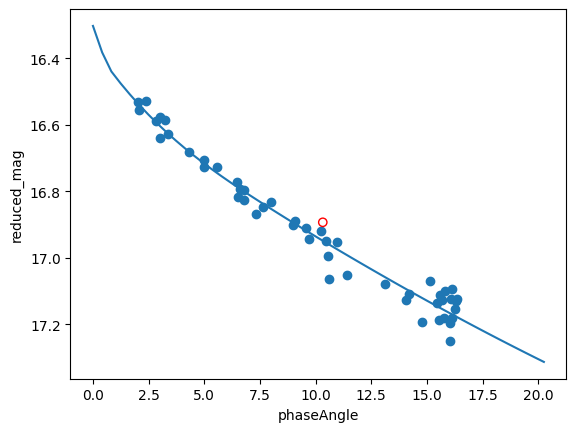

61974.0 61975.0 50 1 Parameter('H', value=16.301117320629164, unit=mag) Parameter('G12', value=0.6532620544619884, unit=, bounds=[0, 1])
[0.00577612] mag
[False]
save data/outlier_6098332225018000_61974
plots/phase_curve_6098332225018000_61974.png


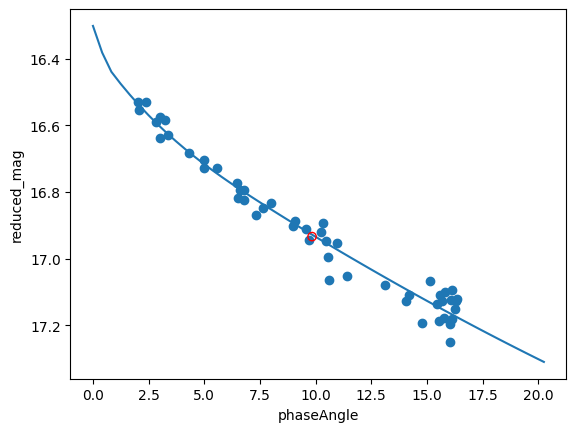

61976.0 61977.0 51 1 Parameter('H', value=16.301269473193823, unit=mag) Parameter('G12', value=0.6538876303590307, unit=, bounds=[0, 1])
[-0.03461984] mag
[False]
save data/outlier_6098332225018000_61976
plots/phase_curve_6098332225018000_61976.png


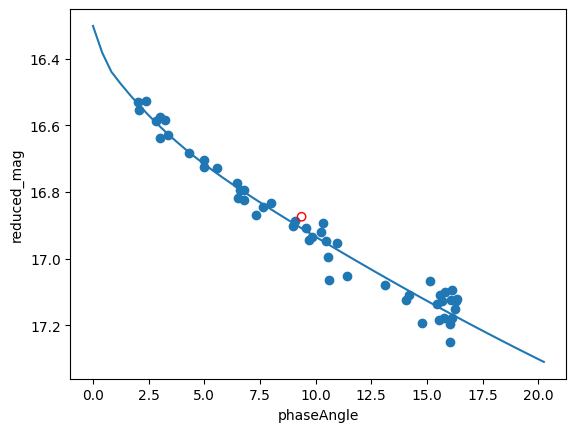

61999.0 62000.0 52 1 Parameter('H', value=16.300378117679422, unit=mag) Parameter('G12', value=0.650540100629068, unit=, bounds=[0, 1])
[0.01286756] mag
[False]
save data/outlier_6098332225018000_61999
plots/phase_curve_6098332225018000_61999.png


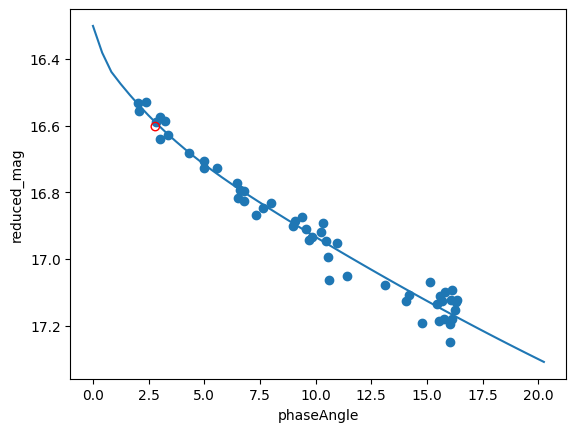

62000.0 62001.0 53 1 Parameter('H', value=16.3000706285954, unit=mag) Parameter('G12', value=0.6453764075291013, unit=, bounds=[0, 1])
[0.01889488] mag
[False]
save data/outlier_6098332225018000_62000
plots/phase_curve_6098332225018000_62000.png


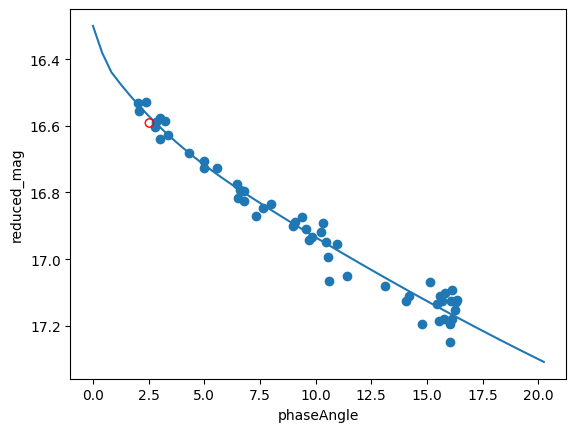

62003.0 62004.0 54 1 Parameter('H', value=16.29997651804096, unit=mag) Parameter('G12', value=0.6415776711795779, unit=, bounds=[0, 1])
[-0.05266196] mag
[False]
save data/outlier_6098332225018000_62003
plots/phase_curve_6098332225018000_62003.png


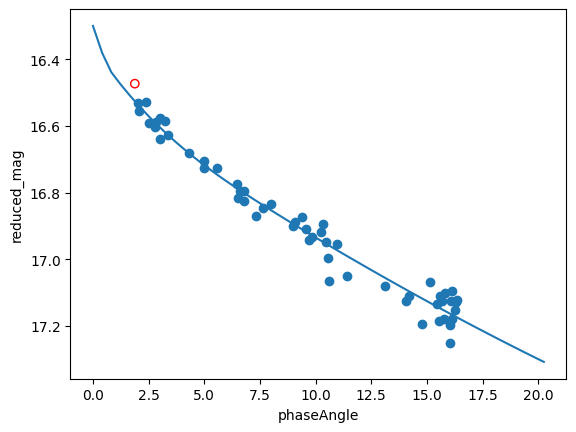

62020.0 62021.0 55 1 Parameter('H', value=16.29897087831393, unit=mag) Parameter('G12', value=0.6416343088380863, unit=, bounds=[0, 1])
[0.0654605] mag
[False]
save data/outlier_6098332225018000_62020
plots/phase_curve_6098332225018000_62020.png


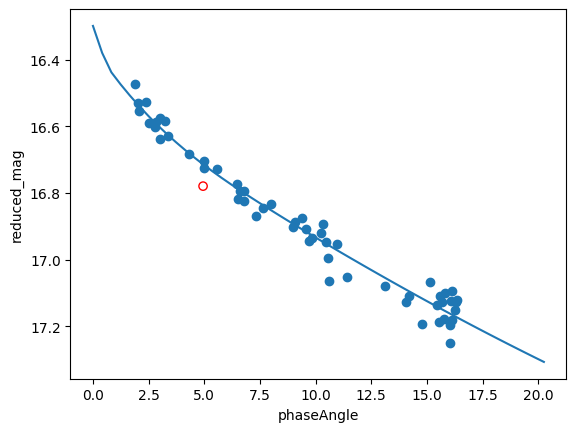

62021.0 62022.0 56 1 Parameter('H', value=16.298373021938435, unit=mag) Parameter('G12', value=0.6361202447936557, unit=, bounds=[0, 1])
[0.02652197] mag
[False]
save data/outlier_6098332225018000_62021
plots/phase_curve_6098332225018000_62021.png


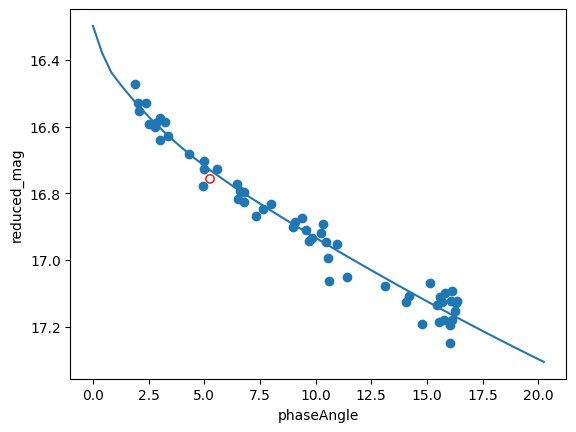

62028.0 62029.0 57 1 Parameter('H', value=16.298057866351616, unit=mag) Parameter('G12', value=0.6331501567874747, unit=, bounds=[0, 1])
[0.01376975] mag
[False]
save data/outlier_6098332225018000_62028
plots/phase_curve_6098332225018000_62028.png


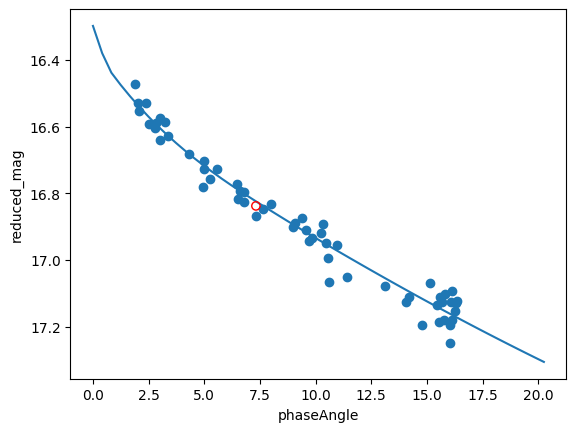

62030.0 62031.0 58 1 Parameter('H', value=16.298100385791596, unit=mag) Parameter('G12', value=0.6326160655674691, unit=, bounds=[0, 1])
[-0.00431665] mag
[False]
save data/outlier_6098332225018000_62030
plots/phase_curve_6098332225018000_62030.png


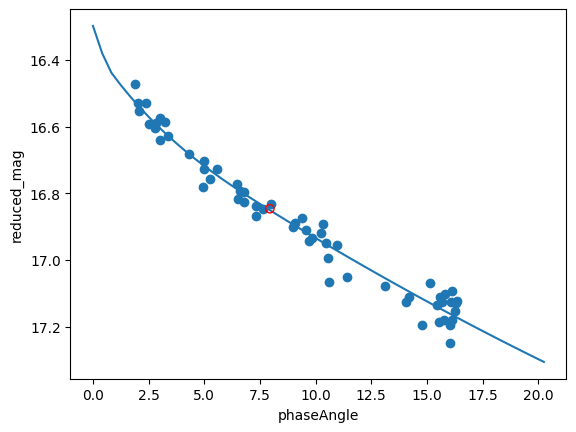

62058.0 62059.0 59 1 Parameter('H', value=16.298006120298155, unit=mag) Parameter('G12', value=0.6325335616287387, unit=, bounds=[0, 1])
[-0.00466104] mag
[False]
save data/outlier_6098332225018000_62058
plots/phase_curve_6098332225018000_62058.png


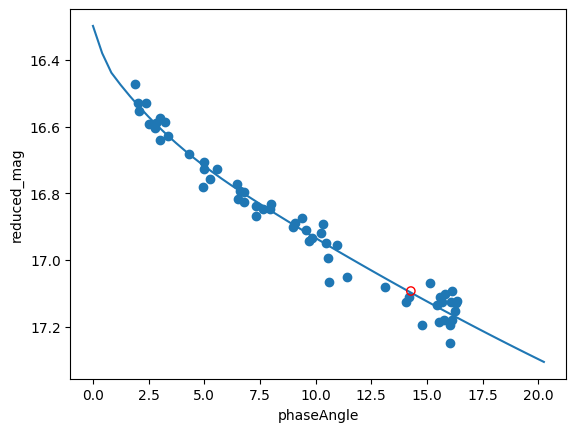

62059.0 62060.0 60 1 Parameter('H', value=16.29733160262361, unit=mag) Parameter('G12', value=0.6290709711169707, unit=, bounds=[0, 1])
[-0.01390745] mag
[False]
save data/outlier_6098332225018000_62059
plots/phase_curve_6098332225018000_62059.png


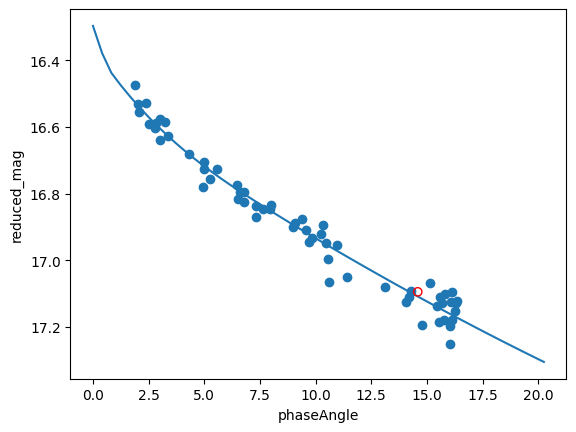

62061.0 62062.0 61 1 Parameter('H', value=16.29645803433283, unit=mag) Parameter('G12', value=0.6245684875299469, unit=, bounds=[0, 1])
[0.11519644] mag
[False]
save data/outlier_6098332225018000_62061
plots/phase_curve_6098332225018000_62061.png


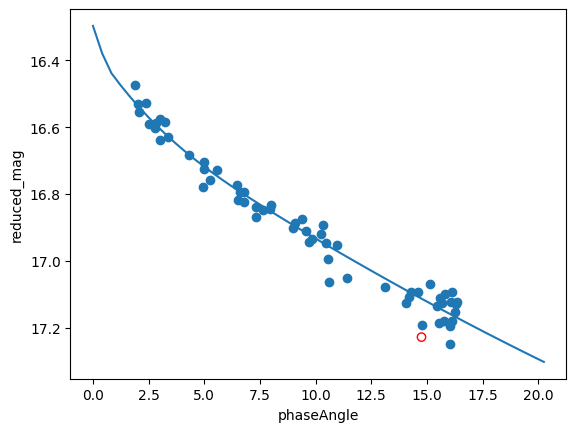

62074.0 62075.0 62 1 Parameter('H', value=16.301059183112972, unit=mag) Parameter('G12', value=0.6483875483629034, unit=, bounds=[0, 1])
[-0.11001617] mag
[False]
save data/outlier_6098332225018000_62074
plots/phase_curve_6098332225018000_62074.png


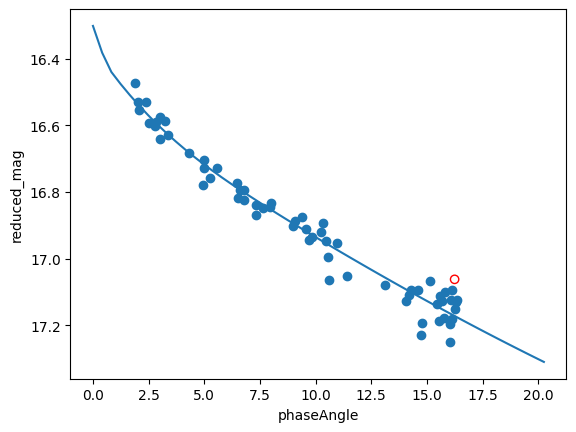

62089.0 62090.0 63 1 Parameter('H', value=16.300454491960103, unit=mag) Parameter('G12', value=0.6451916147339685, unit=, bounds=[0, 1])
[-0.02748073] mag
[False]
save data/outlier_6098332225018000_62089
plots/phase_curve_6098332225018000_62089.png


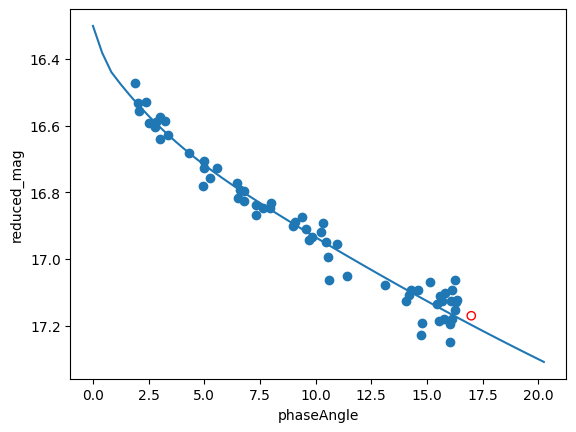

62091.0 62092.0 64 1 Parameter('H', value=16.299640848886693, unit=mag) Parameter('G12', value=0.6408638545137483, unit=, bounds=[0, 1])
[0.01807503] mag
[False]
save data/outlier_6098332225018000_62091
plots/phase_curve_6098332225018000_62091.png


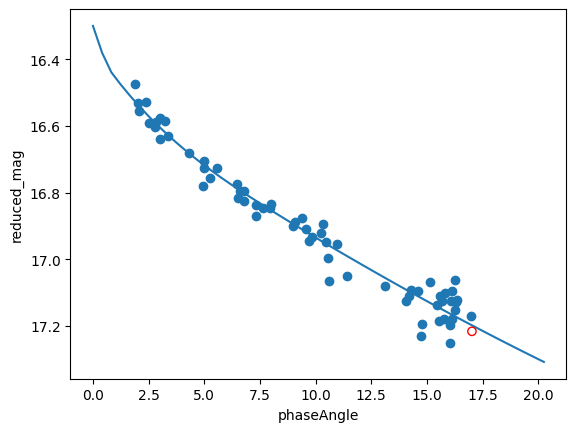

62442.0 62443.0 65 1 Parameter('H', value=16.300140038596133, unit=mag) Parameter('G12', value=0.6435193041561114, unit=, bounds=[0, 1])
[-0.0161026] mag
[False]
save data/outlier_6098332225018000_62442
plots/phase_curve_6098332225018000_62442.png


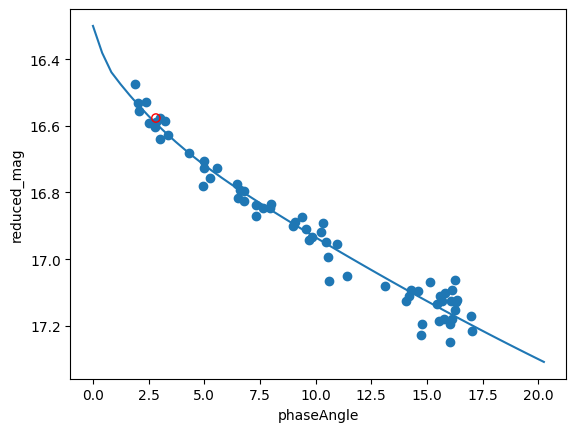

62445.0 62446.0 66 1 Parameter('H', value=16.300365177070947, unit=mag) Parameter('G12', value=0.6476742635098589, unit=, bounds=[0, 1])
[-0.02095675] mag
[False]
save data/outlier_6098332225018000_62445
plots/phase_curve_6098332225018000_62445.png


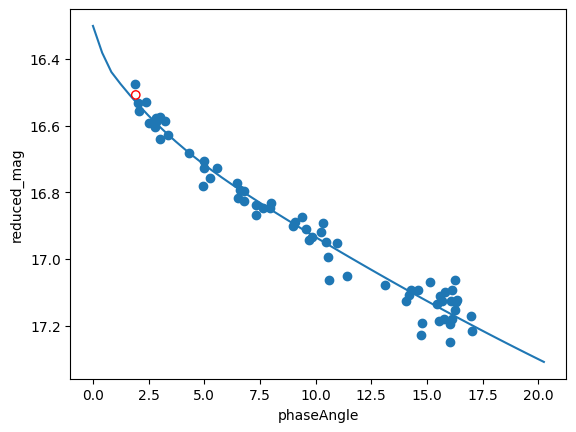

62469.0 62470.0 67 1 Parameter('H', value=16.29958711148825, unit=mag) Parameter('G12', value=0.6493071407436458, unit=, bounds=[0, 1])
[0.02278843] mag
[False]
save data/outlier_6098332225018000_62469
plots/phase_curve_6098332225018000_62469.png


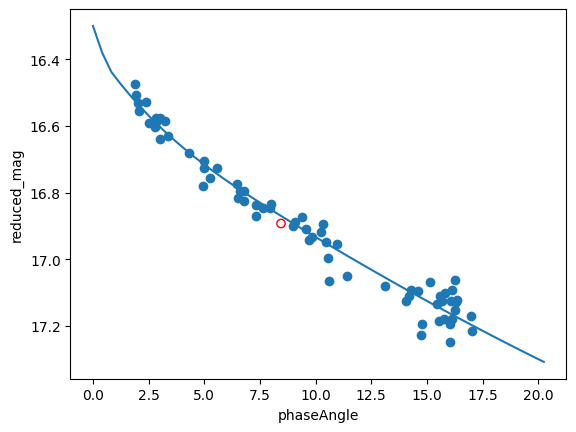

62494.0 62495.0 68 1 Parameter('H', value=16.301248931541075, unit=mag) Parameter('G12', value=0.6526647566524683, unit=, bounds=[0, 1])
[-0.05058492] mag
[False]
save data/outlier_6098332225018000_62494
plots/phase_curve_6098332225018000_62494.png


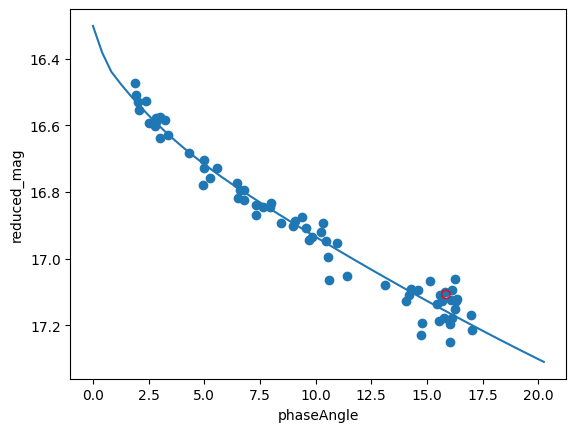

62883.0 62884.0 69 1 Parameter('H', value=16.297449492421453, unit=mag) Parameter('G12', value=0.6325223201505338, unit=, bounds=[0, 1])
[0.006141] mag
[False]
save data/outlier_6098332225018000_62883
plots/phase_curve_6098332225018000_62883.png


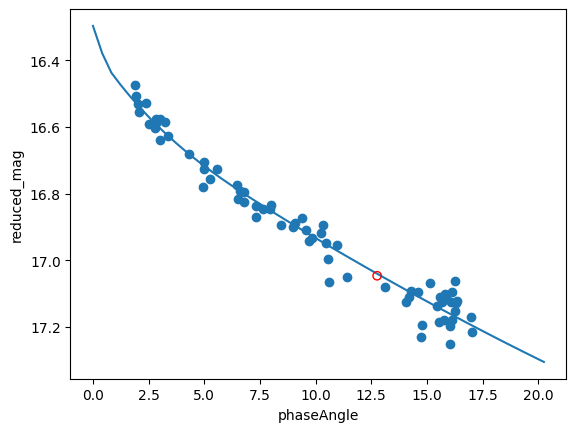

62893.0 62894.0 70 1 Parameter('H', value=16.298936660714425, unit=mag) Parameter('G12', value=0.6399315283785966, unit=, bounds=[0, 1])
[-0.00427818] mag
[False]
save data/outlier_6098332225018000_62893
plots/phase_curve_6098332225018000_62893.png


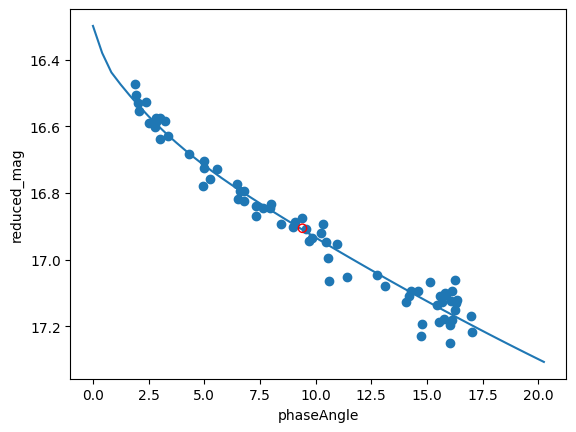

62910.0 62911.0 71 2 Parameter('H', value=16.29864692038259, unit=mag) Parameter('G12', value=0.6389960263911876, unit=, bounds=[0, 1])
[-0.00422009  0.01479932] mag
[False False]
save data/outlier_6098332225018000_62910
plots/phase_curve_6098332225018000_62910.png


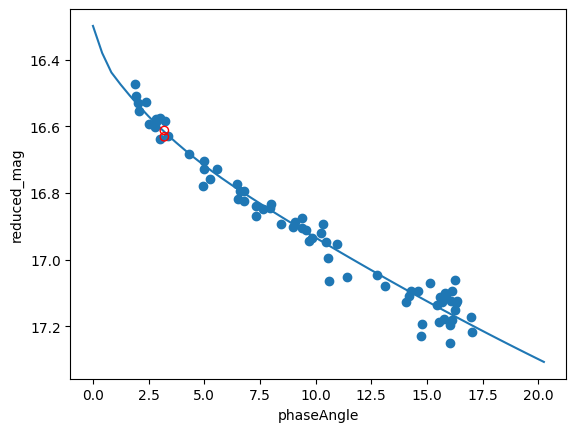

62913.0 62914.0 73 2 Parameter('H', value=16.298110956232282, unit=mag) Parameter('G12', value=0.6322569585525732, unit=, bounds=[0, 1])
[-0.01486144  0.00014448] mag
[False False]
save data/outlier_6098332225018000_62913
plots/phase_curve_6098332225018000_62913.png


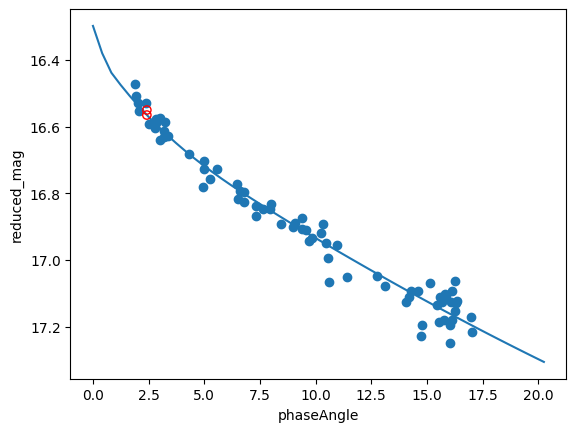

62915.0 62916.0 75 1 Parameter('H', value=16.298176447749643, unit=mag) Parameter('G12', value=0.6369379586226033, unit=, bounds=[0, 1])
[-0.00262826] mag
[False]
save data/outlier_6098332225018000_62915
plots/phase_curve_6098332225018000_62915.png


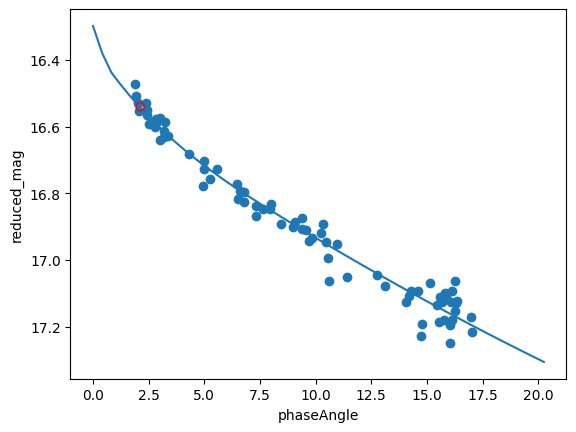

62918.0 62919.0 76 1 Parameter('H', value=16.298119398914388, unit=mag) Parameter('G12', value=0.6374957207539649, unit=, bounds=[0, 1])
[-0.00193705] mag
[False]
save data/outlier_6098332225018000_62918
plots/phase_curve_6098332225018000_62918.png


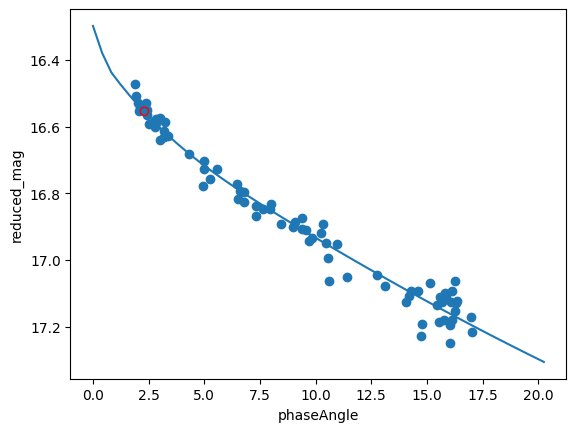

62924.0 62925.0 77 1 Parameter('H', value=16.298111976661406, unit=mag) Parameter('G12', value=0.6382214269987784, unit=, bounds=[0, 1])
[0.00034094] mag
[False]
save data/outlier_6098332225018000_62924
plots/phase_curve_6098332225018000_62924.png


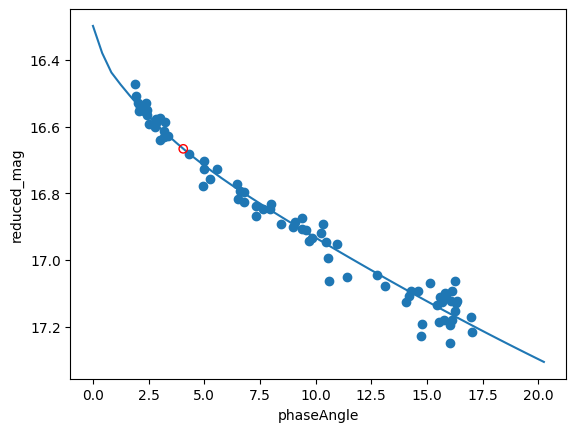

62926.0 62927.0 78 1 Parameter('H', value=16.29808261127518, unit=mag) Parameter('G12', value=0.6379535854405034, unit=, bounds=[0, 1])
[0.01663289] mag
[False]
save data/outlier_6098332225018000_62926
plots/phase_curve_6098332225018000_62926.png


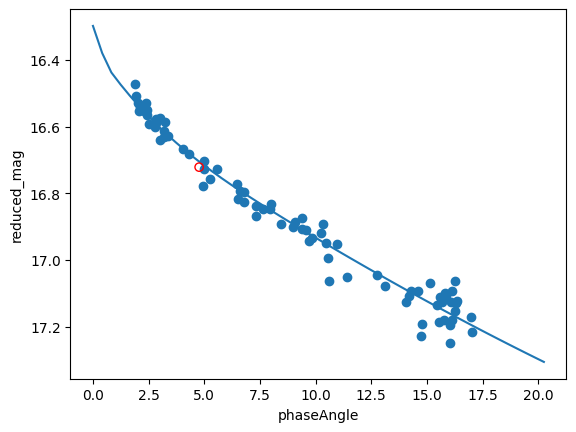

62939.0 62940.0 79 1 Parameter('H', value=16.296359297839764, unit=mag) Parameter('G12', value=0.6225861376104399, unit=, bounds=[0, 1])
[0.00465249] mag
[False]
save data/outlier_6098332225018000_62939
plots/phase_curve_6098332225018000_62939.png


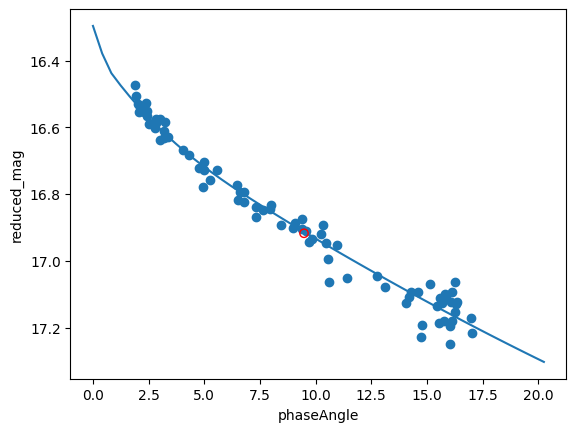

62947.0 62948.0 80 2 Parameter('H', value=16.29668970344882, unit=mag) Parameter('G12', value=0.6239363262671233, unit=, bounds=[0, 1])
[-0.00593219 -0.00097063] mag
[False False]
save data/outlier_6098332225018000_62947
plots/phase_curve_6098332225018000_62947.png


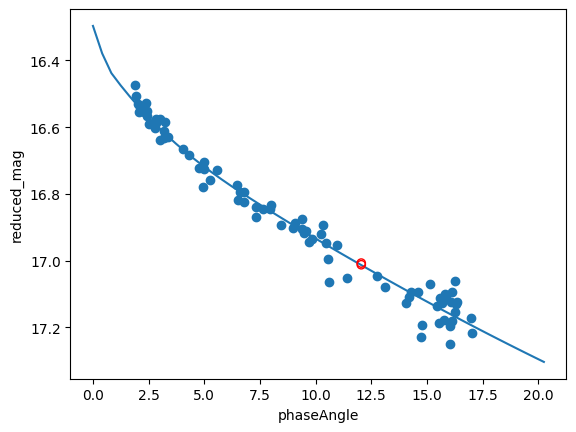

62949.0 62950.0 82 1 Parameter('H', value=16.29594806685797, unit=mag) Parameter('G12', value=0.6203193991489266, unit=, bounds=[0, 1])
[-0.02005557] mag
[False]
save data/outlier_6098332225018000_62949
plots/phase_curve_6098332225018000_62949.png


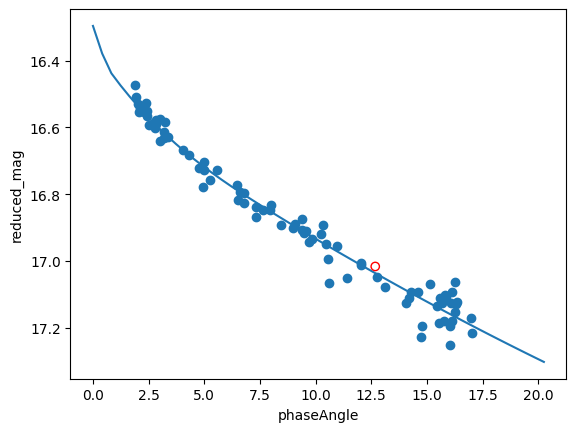

62950.0 62951.0 83 1 Parameter('H', value=16.29485172778666, unit=mag) Parameter('G12', value=0.6148748336689772, unit=, bounds=[0, 1])
[-0.01180904] mag
[False]
save data/outlier_6098332225018000_62950
plots/phase_curve_6098332225018000_62950.png


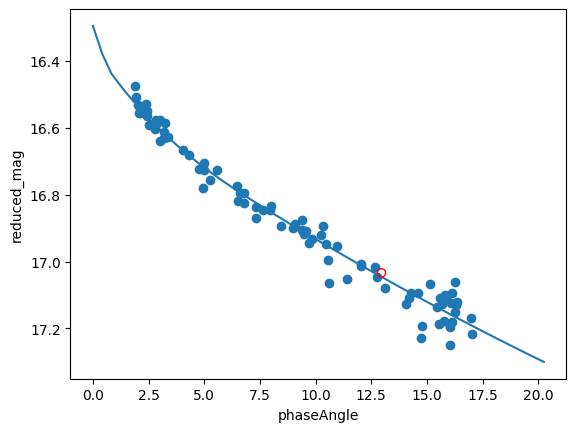

62979.0 62980.0 84 1 Parameter('H', value=16.29334562219735, unit=mag) Parameter('G12', value=0.6073503348953926, unit=, bounds=[0, 1])
[0.0549484] mag
[False]
save data/outlier_6098332225018000_62979
plots/phase_curve_6098332225018000_62979.png


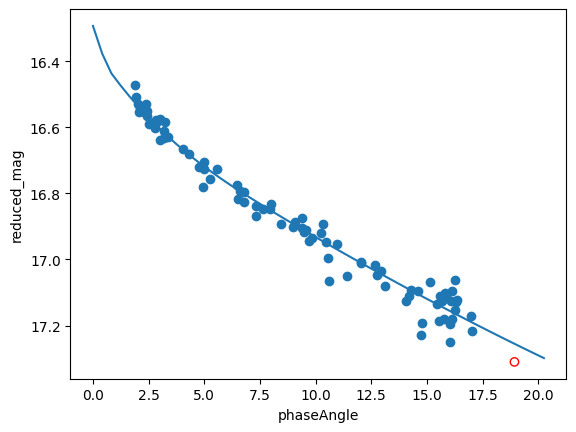

62991.0 62992.0 85 1 Parameter('H', value=16.297587422265043, unit=mag) Parameter('G12', value=0.6301952016844469, unit=, bounds=[0, 1])
[-0.07333287] mag
[False]
save data/outlier_6098332225018000_62991
plots/phase_curve_6098332225018000_62991.png


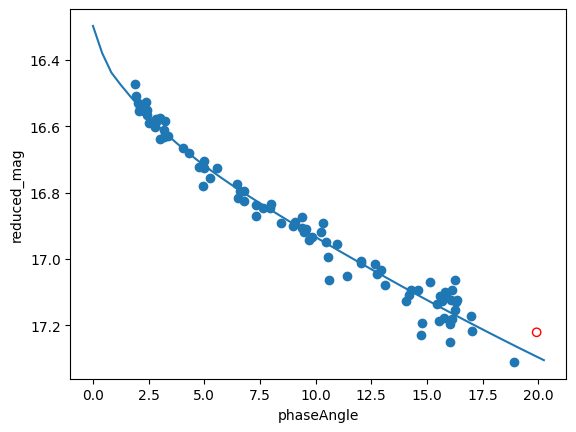

62998.0 62999.0 86 1 Parameter('H', value=16.29659353330305, unit=mag) Parameter('G12', value=0.6248040330052437, unit=, bounds=[0, 1])
[-0.0012476] mag
[False]
save data/outlier_6098332225018000_62998
plots/phase_curve_6098332225018000_62998.png


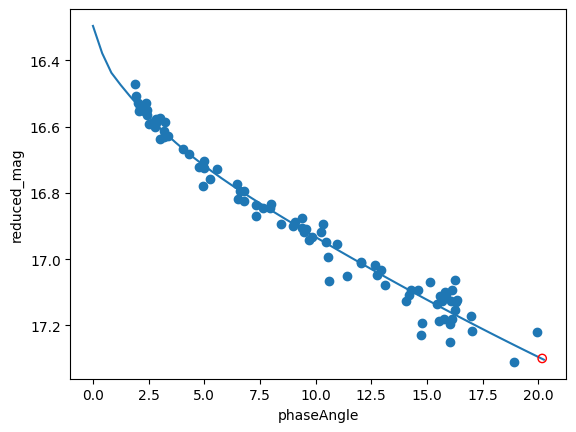

63001.0 63002.0 87 1 Parameter('H', value=16.296561267812663, unit=mag) Parameter('G12', value=0.6246288991537828, unit=, bounds=[0, 1])
[0.01218956] mag
[False]
save data/outlier_6098332225018000_63001
plots/phase_curve_6098332225018000_63001.png


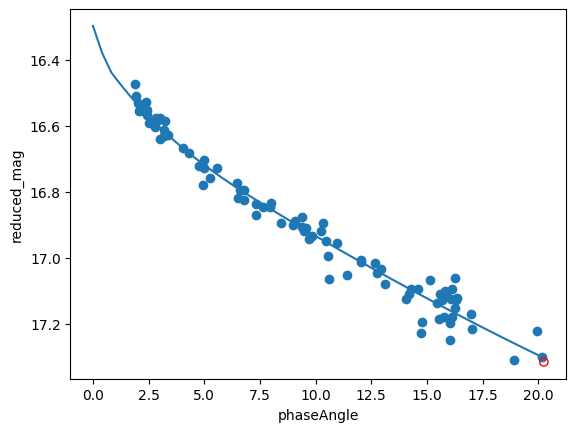

63011.0 63012.0 88 1 Parameter('H', value=16.297087641144905, unit=mag) Parameter('G12', value=0.6274878379702091, unit=, bounds=[0, 1])
[-0.00218594] mag
[False]
save data/outlier_6098332225018000_63011
plots/phase_curve_6098332225018000_63011.png


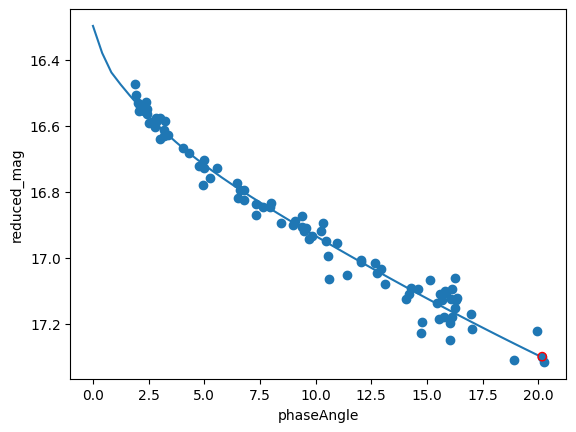

63305.0 63306.0 89 2 Parameter('H', value=16.29706956018685, unit=mag) Parameter('G12', value=0.6273896443694414, unit=, bounds=[0, 1])
[-1.46660031 -1.50260855] mag
[ True  True]
save data/outlier_6098332225018000_63305
plots/phase_curve_6098332225018000_63305.png


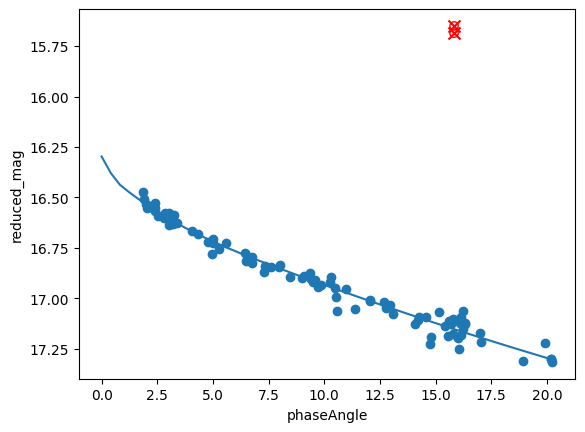

63308.0 63309.0 89 2 Parameter('H', value=16.29706956018685, unit=mag) Parameter('G12', value=0.6273896443694414, unit=, bounds=[0, 1])
[-1.46460415 -1.46161013] mag
[ True  True]
save data/outlier_6098332225018000_63308
plots/phase_curve_6098332225018000_63308.png


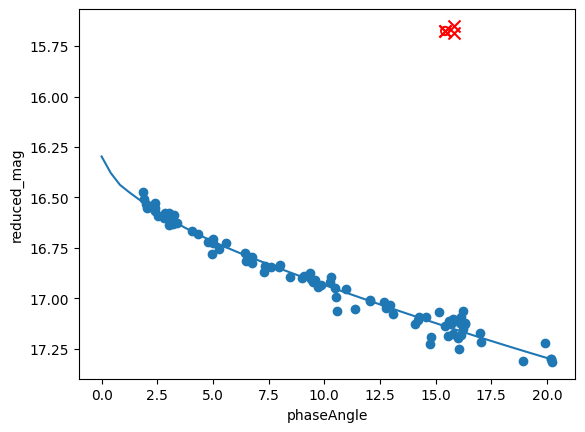

63316.0 63317.0 89 1 Parameter('H', value=16.29706956018685, unit=mag) Parameter('G12', value=0.6273896443694414, unit=, bounds=[0, 1])
[-1.42001142] mag
[ True]
save data/outlier_6098332225018000_63316
plots/phase_curve_6098332225018000_63316.png


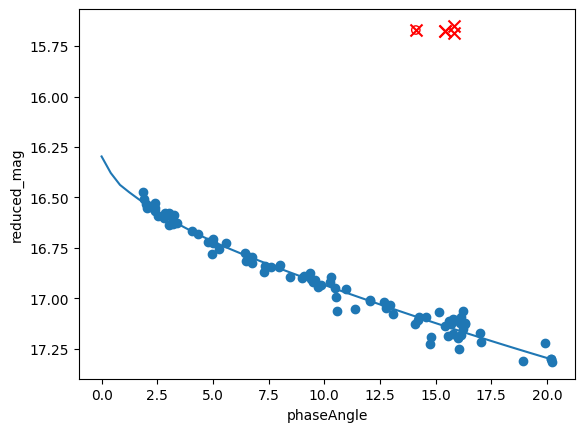

63335.0 63336.0 89 1 Parameter('H', value=16.29706956018685, unit=mag) Parameter('G12', value=0.6273896443694414, unit=, bounds=[0, 1])
[-1.47990554] mag
[ True]
save data/outlier_6098332225018000_63335
plots/phase_curve_6098332225018000_63335.png


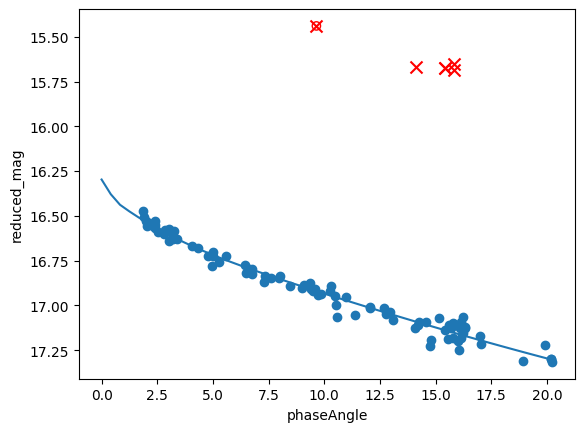

63367.0 63368.0 89 1 Parameter('H', value=16.29706956018685, unit=mag) Parameter('G12', value=0.6273896443694414, unit=, bounds=[0, 1])
[-1.50473839] mag
[ True]
save data/outlier_6098332225018000_63367
plots/phase_curve_6098332225018000_63367.png


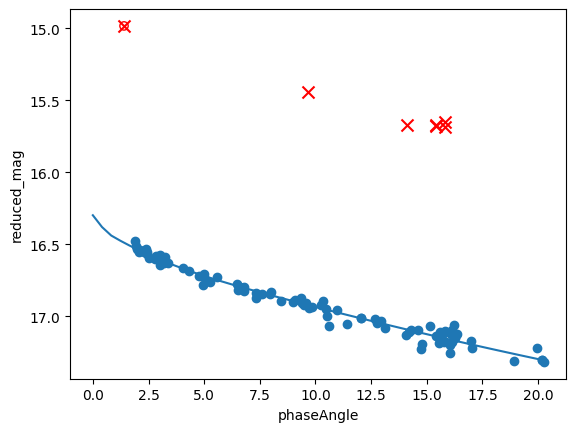

63447.0 63448.0 89 1 Parameter('H', value=16.29706956018685, unit=mag) Parameter('G12', value=0.6273896443694414, unit=, bounds=[0, 1])
[-1.54572707] mag
[ True]
save data/outlier_6098332225018000_63447
plots/phase_curve_6098332225018000_63447.png


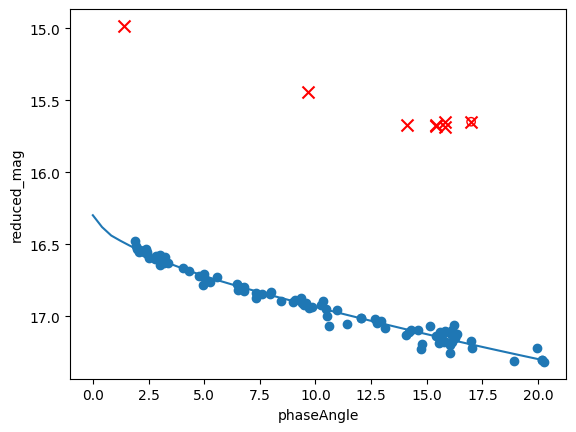

63744.0 63745.0 89 1 Parameter('H', value=16.29706956018685, unit=mag) Parameter('G12', value=0.6273896443694414, unit=, bounds=[0, 1])
[-0.00301088] mag
[False]
save data/outlier_6098332225018000_63744
plots/phase_curve_6098332225018000_63744.png


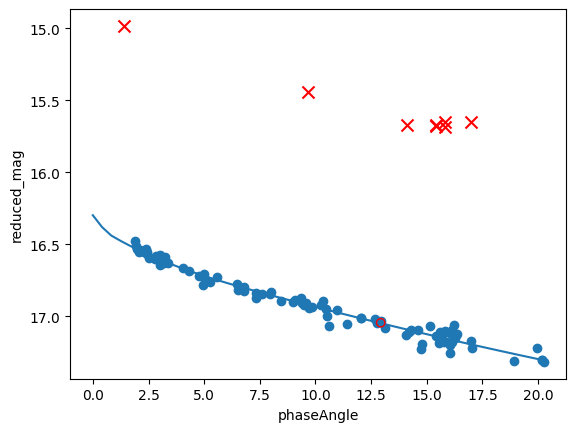

63793.0 63794.0 90 1 Parameter('H', value=16.297034901494676, unit=mag) Parameter('G12', value=0.6272199397103912, unit=, bounds=[0, 1])
[-0.02549876] mag
[False]
save data/outlier_6098332225018000_63793
plots/phase_curve_6098332225018000_63793.png


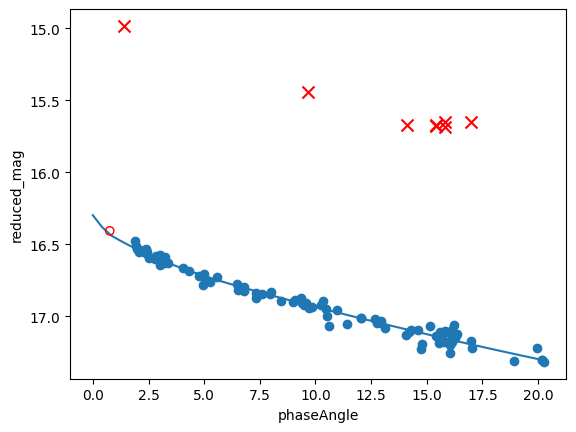

63803.0 63804.0 91 1 Parameter('H', value=16.29675732329404, unit=mag) Parameter('G12', value=0.6261550990434358, unit=, bounds=[0, 1])
[-0.04362254] mag
[False]
save data/outlier_6098332225018000_63803
plots/phase_curve_6098332225018000_63803.png


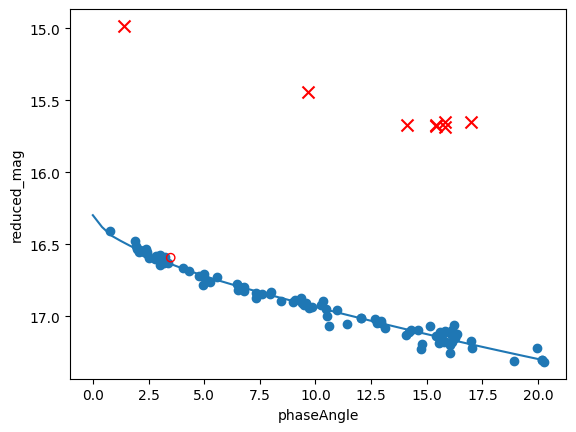

63804.0 63805.0 92 1 Parameter('H', value=16.296866526654988, unit=mag) Parameter('G12', value=0.6275630887016324, unit=, bounds=[0, 1])
[0.00242398] mag
[False]
save data/outlier_6098332225018000_63804
plots/phase_curve_6098332225018000_63804.png


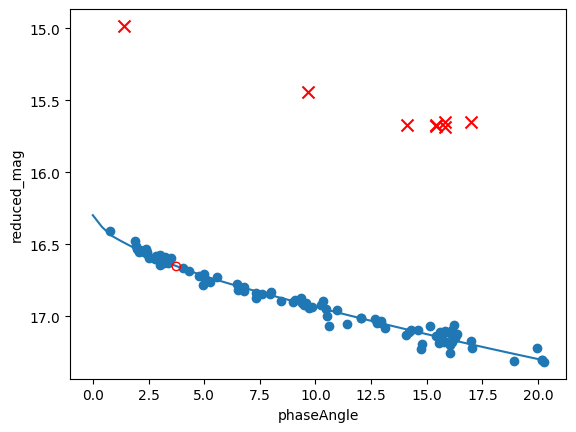

63821.0 63822.0 93 1 Parameter('H', value=16.29685417825751, unit=mag) Parameter('G12', value=0.6274138228383257, unit=, bounds=[0, 1])
[0.00663597] mag
[False]
save data/outlier_6098332225018000_63821
plots/phase_curve_6098332225018000_63821.png


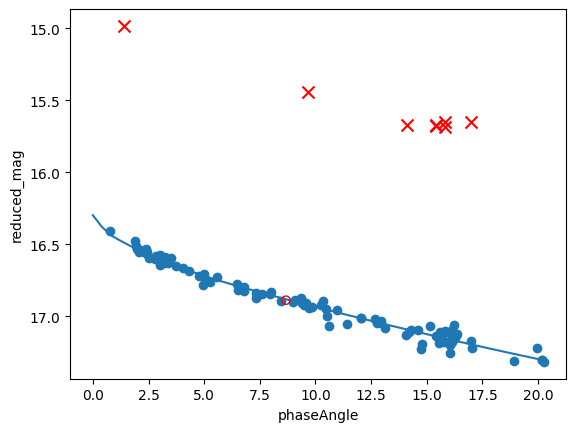

63823.0 63824.0 94 1 Parameter('H', value=16.296863617580957, unit=mag) Parameter('G12', value=0.6274329271177836, unit=, bounds=[0, 1])
[-0.06273261] mag
[False]
save data/outlier_6098332225018000_63823
plots/phase_curve_6098332225018000_63823.png


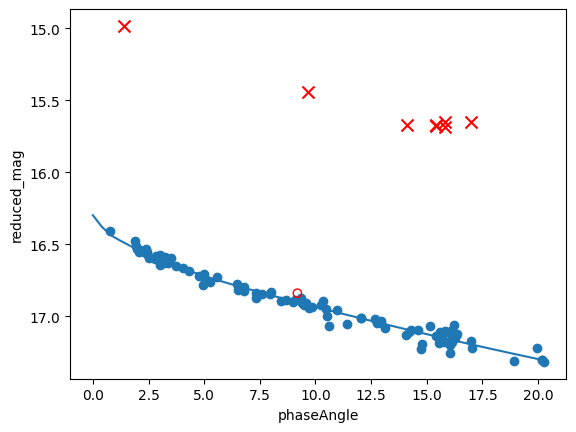

63825.0 63826.0 95 1 Parameter('H', value=16.296728176450056, unit=mag) Parameter('G12', value=0.6270265054396562, unit=, bounds=[0, 1])
[-0.09109762] mag
[False]
save data/outlier_6098332225018000_63825
plots/phase_curve_6098332225018000_63825.png


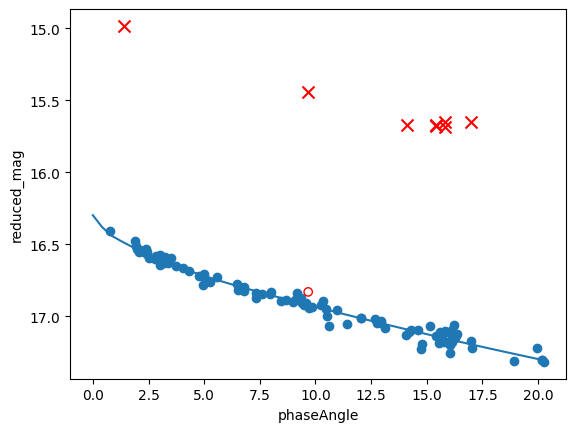

63827.0 63828.0 96 1 Parameter('H', value=16.29647713721704, unit=mag) Parameter('G12', value=0.6261311092465276, unit=, bounds=[0, 1])
[0.00477652] mag
[False]
save data/outlier_6098332225018000_63827
plots/phase_curve_6098332225018000_63827.png


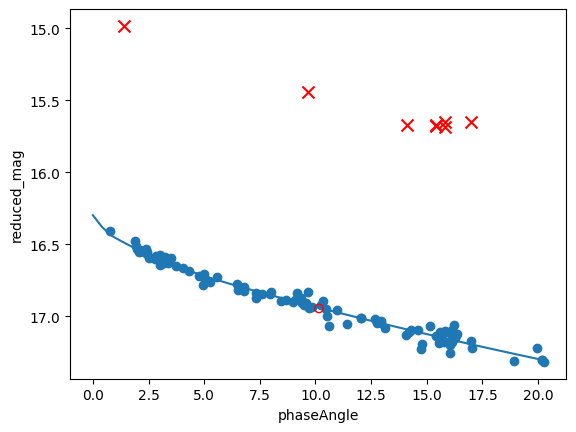

63829.0 63830.0 97 2 Parameter('H', value=16.29651483606806, unit=mag) Parameter('G12', value=0.6262800674989736, unit=, bounds=[0, 1])
[ 0.08425331 -0.02273217] mag
[False False]
save data/outlier_6098332225018000_63829
plots/phase_curve_6098332225018000_63829.png


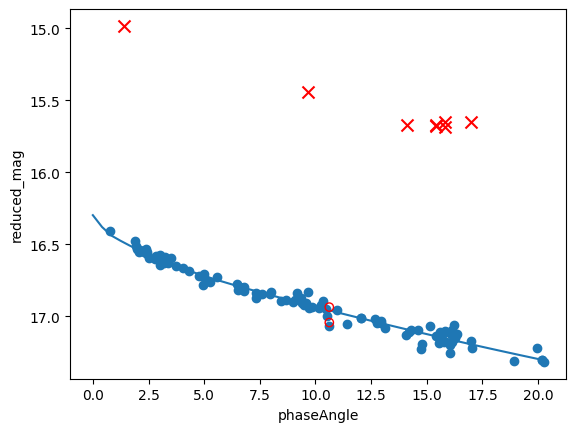

63839.0 63840.0 99 1 Parameter('H', value=16.297460785553884, unit=mag) Parameter('G12', value=0.630271051108613, unit=, bounds=[0, 1])
[0.00750267] mag
[False]
save data/outlier_6098332225018000_63839
plots/phase_curve_6098332225018000_63839.png


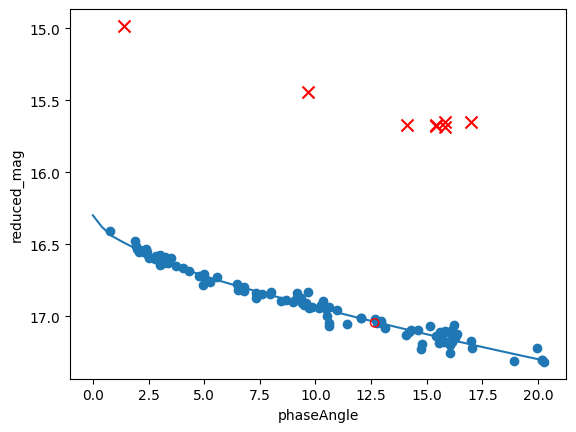

63851.0 63852.0 100 1 Parameter('H', value=16.297563976388204, unit=mag) Parameter('G12', value=0.6307733053409103, unit=, bounds=[0, 1])
[-0.016913] mag
[False]
save data/outlier_6098332225018000_63851
plots/phase_curve_6098332225018000_63851.png


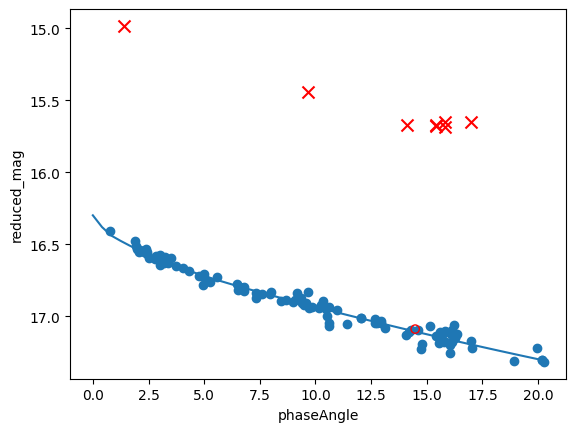

In [21]:
N_pc_fit = 10
diff_cut = 1.0
filt = "r"

# get the filter SSObject metadata
sso = planetoid2.SSObject_in_filter(filt)

# get the observations
obs = planetoid2.observations_in_filter(filt)
df_obs = pd.DataFrame(obs.__dict__)

# get the LSST phase curve filter model
pc = PhaseCurve(
    abs_mag=sso.H * u.mag,
    phase_param=0.62,
    model_name="HG12_Pen16",
)

j = 0
for i, t0 in enumerate(data_nights):
    t1 = t0 + 1

    # load the df_obs outlier column here
    outlier_file_load = "data/outlier_{}_{}.npy".format(ssoid2, int(data_nights[i - 1]))
    outlier_file_save = "data/outlier_{}_{}".format(ssoid2, int(t0))
    if j == 0:
        outliers = [False] * len(df_obs)
    else:
        outliers = np.load(outlier_file_load)
    df_obs["outlier"] = outliers

    t_mask = df_obs["midPointMjdTai"] < t1
    _df_obs = df_obs[t_mask]
    mask = _df_obs["midPointMjdTai"] < t0
    df_obs_old = _df_obs[(mask) & (_df_obs["outlier"] == False)]
    df_obs_new = _df_obs[~mask]

    if len(df_obs_old) < 2:
        print("continue")
        continue
    else:
        j = 1

    if len(df_obs_old) < N_pc_fit:
        # use an assumed value of G12 until more data is available
        pc.model_function.G12.fixed = True
    else:
        pc.model_function.G12.fixed = False

    # do a simple HG12_Pen16 fit to the past data
    pc_fit = pc.FitModel(
        np.array(df_obs_old["phaseAngle"]) * u.deg,
        np.array(df_obs_old["reduced_mag"]) * u.mag,
        np.array(df_obs_old["magErr"]) * u.mag,
    )
    pc_fit = pc.InitModelSbpy(pc_fit)

    print(t0, t1, len(df_obs_old), len(df_obs_new), pc_fit.model_function.H, pc_fit.model_function.G12)

    # find outliers in new data
    # calculate data - model residuals
    res = (np.array(df_obs_new["reduced_mag"]) * u.mag) - pc_fit.ReducedMag(
        np.array(df_obs_new["phaseAngle"]) * u.deg
    )

    outlier_flag = sci_utils.outlier_diff(res.value, diff_cut=diff_cut)
    print(outlier_flag)

    df_obs.loc[(t_mask & ~mask), "outlier"] = outlier_flag

    # save the df_obs outlier column, in reality it would have been saved as part of AdlerData on the server
    print("save {}".format(outlier_file_save))
    np.save(outlier_file_save, np.array(df_obs["outlier"]))

    # make a plot
    fig = plot_errorbar(planetoid2, filt_list=[])
    ax1 = fig.axes[0]
    ax1.scatter(df_obs_old["phaseAngle"], df_obs_old["reduced_mag"], c="C0")
    alpha = np.linspace(0, np.amax(obs.phaseAngle)) * u.deg
    ax1.plot(alpha.value, pc_fit.ReducedMag(alpha).value, label="t={}".format(int(t0)))
    ax1.scatter(
        df_obs_new["phaseAngle"], df_obs_new["reduced_mag"], edgecolor="r", facecolor="none", zorder=3
    )

    # ax1.scatter(df_obs_new.loc[outlier_flag]["phaseAngle"], df_obs_new.loc[outlier_flag]["reduced_mag"], c = "r", marker = "x", s= 75, zorder = 3)
    out_mask = df_obs["outlier"] == True
    ax1.scatter(
        df_obs.loc[out_mask]["phaseAngle"],
        df_obs.loc[out_mask]["reduced_mag"],
        c="r",
        marker="x",
        s=75,
        zorder=3,
    )
    fig_file = "plots/phase_curve_{}_{}.png".format(ssoid2, int(t0))
    print(fig_file)
    fig = plot_errorbar(planetoid2, fig=fig, filename=fig_file)
    plt.show()

In [22]:
df_obs[df_obs["outlier"] == True]

,ssObjectId,filter_name,mag,magErr,midPointMjdTai,ra,dec,phaseAngle,topocentricDist,heliocentricDist,reduced_mag,num_obs,outlier
9,6098332225018000,r,20.370001,0.048,63316.24186,235.543880,-23.609779,14.111782,2.628249,3.313144,15.670466,109,True
10,6098332225018000,r,20.440001,0.035,63308.28558,235.622369,-23.573720,15.427403,2.717945,3.303755,15.673758,109,True
11,6098332225018000,r,20.443001,0.037,63308.28513,235.622362,-23.573714,15.427469,2.717950,3.303755,15.676755,109,True
12,6098332225018000,r,20.478001,0.033,63305.34774,235.561591,-23.539039,15.830622,2.753026,3.300262,15.686207,109,True
13,6098332225018000,r,20.441999,0.031,63305.34722,235.561579,-23.539029,15.830690,2.753032,3.300262,15.650201,109,True
17,6098332225018000,r,20.006001,0.021,63335.34367,233.939466,-23.324965,9.647348,2.455453,3.335253,15.439699,109,True
38,6098332225018000,r,19.488001,0.012,63367.27448,228.204497,-21.711843,1.400126,2.362097,3.370733,14.982891,109,True
50,6098332225018000,r,20.851000,0.059,63447.03748,224.390778,-18.862764,16.988611,3.182638,3.450027,15.647951,109,True
